# Table of Contents

- [Introduction](#introduction)
  - [Initialization](#initialization)
  - [Utility Functions](#utility-functions)
- [Data Understanding for the Cyclists dataset](#data-understanding-for-the-cyclists-dataset)
  - [Fixing the types](#fixing-the-types)
  - [Data Semantics](#data-semantics)
  - [Analysis of single attributes](#analysis-of-single-attributes)
    - [The `birth_year` attribute](#the-birth_year-attribute)
    - [The `weight` attribute](#the-weight-attribute)
    - [The `height` attribute](#the-height-attribute)
    - [The `nationality` attribute](#the-nationality-attribute)
  - [Correlation](#correlation)
- [Data Unserstanding for the Races dataset](#data-unserstanding-for-the-races-dataset)
  - [Type Casting](#type-casting)
  - [Semantic analysis of the attributes](#semantic-analysis-of-the-attributes)
  - [Analysis of single attributes](#analysis-of-single-attributes)
    - [The `is_gravel`, `is_tarmac`, `is_cobbled` attributes](#the-is_gravel,-is_tarmac,-is_cobbled-attributes)
    - [Points attributes](#points-attributes)
    - [UCI points attribute](#uci-points-attribute)
    - [length attribute](#length-attribute)
    - [climb_total attribute](#climb_total-attribute)
    - [Profile attribute](#profile-attribute)
    - [startlist_quality attribute](#startlist_quality-attribute)
    - [average_temperature attribute](#average_temperature-attribute)
    - [date attribute](#date-attribute)
    - [position attribute](#position-attribute)
    - [Cyclist Age attribute](#cyclist-age-attribute)
    - [cyclist_team attribute](#cyclist_team-attribute)
    - [delta attribute](#delta-attribute)
  - [Correlation](#correlation)
  - [More observations](#more-observations)
- [Data Transformation for the Cyclists dataset](#data-transformation-for-the-cyclists-dataset)
  - [Attributes](#attributes)
  - [BMI feature](#bmi-feature)
  - [races_participated attribute](#races_participated-attribute)
  - [Handling missing values](#handling-missing-values)
    - [Handle missing birth year values](#handle-missing-birth-year-values)
    - [Handle missing values for weight and height](#handle-missing-values-for-weight-and-height)
  - [Feature Engineering](#feature-engineering)
- [Data Understanding Miscellanea](#data-understanding-miscellanea)
- [Data Transformation for the Races dataset](#data-transformation-for-the-races-dataset)
  - [Missing Values](#missing-values)
  - [Discretization](#discretization)
- [Conclusions](#conclusions)


# Introduction

## Initialization

In [504]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math



# Autoreload allows the notebook to dynamically load code: if we update some helper functions outside of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

# All auxiliary code is in ../src
# code taken from: https://github.com/data-mining-UniPI/teaching24/tree/main/src
import sys
sys.path.append("./src/")

# Set style for seaborn
sns.set_theme(style="darkgrid")

# Other available themes:
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="dark")
# sns.set_theme(style="white")
# sns.set_theme(style="ticks")



# Load the races dataset
races_df = pd.read_csv('./races.csv')

# Load dataset
cyclists_df = pd.read_csv('./cyclists.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Utility Functions

In [505]:
# utility functions


# Example: If a column has values [1.0, 2.5, 3.0, 4.75], the function will return 2 (for 2.5 and 4.75)
def count_non_zero_decimal_values(df, column_name):
    return df[column_name].apply(
        lambda x: x != int(x) if pd.notnull(x) else False
    ).sum()
    
def display_missing_values(df: pd.DataFrame, df_name: str) -> None:
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df) * 100).round(2)
    
    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })
    
    print(f"\nNumber of missing values and their percentage in {df_name}:")
    print(missing_data)



# TODO: usare questa funzione dove necessario
def print_boxplots(df, numerical_columns):
    """
    Visualize boxplots for a list of numerical columns in a dataframe, useful to visualize outliers.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    numerical_columns (list): List of numerical columns to visualize outliers.

    Returns:
    None (as a side effect, the boxplots are displayed).
    """
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(3, 2, i)
        sns.boxplot(x=df[column].dropna())
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Data Understanding for the Cyclists dataset

In [506]:
# Display dataset information
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [507]:
# Display the first few rows of the dataset
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


## Fixing the types


In [508]:
# Cast to string
cyclists_df['_url'] = cyclists_df['_url'].astype('string')
cyclists_df['name'] = cyclists_df['name'].astype('string')
cyclists_df['nationality'] = cyclists_df['nationality'].astype('string')

In [509]:
# Cast to INT
cyclists_df['birth_year'] = cyclists_df['birth_year'].astype('Int64')



---


Let's observe wether we can cast the weight attribute to an integer type.
We observe that the number of values of the weight attribute that have a decimal part not equal to zero is very low. Therefore, we can cast the weight attribute to an integer type.

In [510]:
print(f"Number of occurrences of weights that are not .0: {count_non_zero_decimal_values(cyclists_df, 'weight')}")

# Approximate weights to the nearest integer, then cast to Int64
cyclists_df['weight'] = cyclists_df['weight'].round().astype('Int64')

print(f"Number of occurrences of weights that are not .0: {count_non_zero_decimal_values(cyclists_df, 'weight')}")

Number of occurrences of weights that are not .0: 15
Number of occurrences of weights that are not .0: 0


We check the same for the height attribute, and decide to cast it to an integer type as well.

In [511]:
# Count the number of occurrences of heights that are not .0
non_zero_decimal_heights = cyclists_df['height'].apply(lambda x: x != int(x) if pd.notnull(x) else False).sum()
print(f"Number of occurrences of heights that are not .0: {non_zero_decimal_heights}")

cyclists_df['height'] = cyclists_df['height'].astype('Int64')

Number of occurrences of heights that are not .0: 0



---

After casting the attributes, these are the new data types of the attributes:

In [512]:
# Print dataset information for cyclists_df
print("Cyclists Dataset Information:")
cyclists_df.info()


Cyclists Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _url         6134 non-null   string
 1   name         6134 non-null   string
 2   birth_year   6121 non-null   Int64 
 3   weight       3078 non-null   Int64 
 4   height       3143 non-null   Int64 
 5   nationality  6133 non-null   string
dtypes: Int64(3), string(3)
memory usage: 305.6 KB


## Data Semantics

We expect URLs to be unique, so we perform a check to see if there are any duplicates in the dataset.

In [513]:
# Check for duplicates in the _url column
duplicate_urls = cyclists_df[cyclists_df['_url'].duplicated(keep=False)]

# Display the duplicate entries
print("Duplicate URLs:")
print(duplicate_urls)

Duplicate URLs:
Empty DataFrame
Columns: [_url, name, birth_year, weight, height, nationality]
Index: []


We also check if there are duplicate names in the dataset, referring to the same cyclist.

In [514]:
# Check for duplicates in the name column
duplicate_names = cyclists_df[cyclists_df['name'].duplicated(keep=False)]

# Display the duplicate entries
print("Duplicate Names:")
print(duplicate_names)

Duplicate Names:
                            _url                name  birth_year  weight  \
347               andrea-peron-1       Andrea  Peron        1971      70   
1745          roman-kreuziger-sr    Roman  Kreuziger        1965    <NA>   
2235           alessandro-pozzi2   Alessandro  Pozzi        1969    <NA>   
2601             roman-kreuziger    Roman  Kreuziger        1986      65   
2682                andrea-peron       Andrea  Peron        1988      70   
2862       antonio-cabello-baena    Antonio  Cabello        1990      67   
2939               jesus-lopez23        Jesús  López        1955    <NA>   
2953     alberto-fernandez-sainz  Alberto  Fernández        1981    <NA>   
3238             antonio-cabello    Antonio  Cabello        1956    <NA>   
4917  sergio-dominguez-rodriguez   Sergio  Domínguez        1979    <NA>   
4919      sergio-dominguez-munoz   Sergio  Domínguez        1986    <NA>   
5040          jesus-lopez-carril        Jesús  López        1949    <NA

The names are the same, but since the birth year and url are different, it is a different person. SO: no duplicates found.


---

Validity check between the datasets

In [515]:
registered_cyclists = set(cyclists_df['_url'])
participating_cyclists = set(races_df['cyclist'])
non_participating_cyclists = registered_cyclists - participating_cyclists
non_registered_cyclists = participating_cyclists - registered_cyclists

if non_participating_cyclists:
    non_participating_df = cyclists_df[cyclists_df['_url'].isin(non_participating_cyclists)]
    display(non_participating_df)
else:
    print("All registered cyclists have participated in at least one race.")
    
# TODO: li rimuoviamo?

,_url,name,birth_year,weight,height,nationality
578,jean-michel-thilloy,Jean-Michel Thilloy,1966,<NA>,<NA>,France
902,gert-van-brabant,Gert Van Brabant,1968,<NA>,<NA>,Belgium
1046,roman-bronis,Roman Broniš,1976,74,187,Slovakia
1176,oleg-grishkine,Oleg Grishkine,1975,<NA>,<NA>,Russia
1330,eddy-torrekens,Eddy Torrekens,1970,<NA>,<NA>,Belgium
1449,philipp-ludescher,Philipp Ludescher,1987,72,187,Austria
1486,nicolas-liboreau,Nicolas Liboreau,1977,<NA>,<NA>,France
1538,gino-primo,Gino Primo,1966,<NA>,<NA>,Belgium
1566,luca-braidot,Luca Braidot,1991,69,179,Italy
1718,tanner-putt,Tanner Putt,1992,75,178,United States


In [516]:

if non_registered_cyclists:
    print("Cyclists who have participated in races but are not registered:")
    print(cyclists_df[cyclists_df['_url'].isin(non_registered_cyclists)])
else:
    print('\nAll cyclists are registered')


All cyclists are registered


## Analysis of single attributes

In [517]:
# Summary statistics
cyclists_df.describe()

,birth_year,weight,height
count,6121.0,3078.0,3143.0
mean,1974.071884,68.658869,179.815145
std,15.535834,6.348963,6.443447
min,1933.0,48.0,154.0
25%,1962.0,64.0,175.0
50%,1974.0,69.0,180.0
75%,1987.0,73.0,184.0
max,2004.0,94.0,204.0


In [518]:
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964,<NA>,<NA>,Italy
1,gerard-rue,Gérard Rué,1965,74,182,France
2,jan-maas,Jan Maas,1996,69,189,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995,78,192,Belgium
4,jose-felix-parra,José Félix Parra,1997,55,171,Spain


### The `birth_year` attribute

Summary Statistics for Birth Year:
count         6121.0
mean     1974.071884
std        15.535834
min           1933.0
25%           1962.0
50%           1974.0
75%           1987.0
max           2004.0
Name: birth_year, dtype: Float64


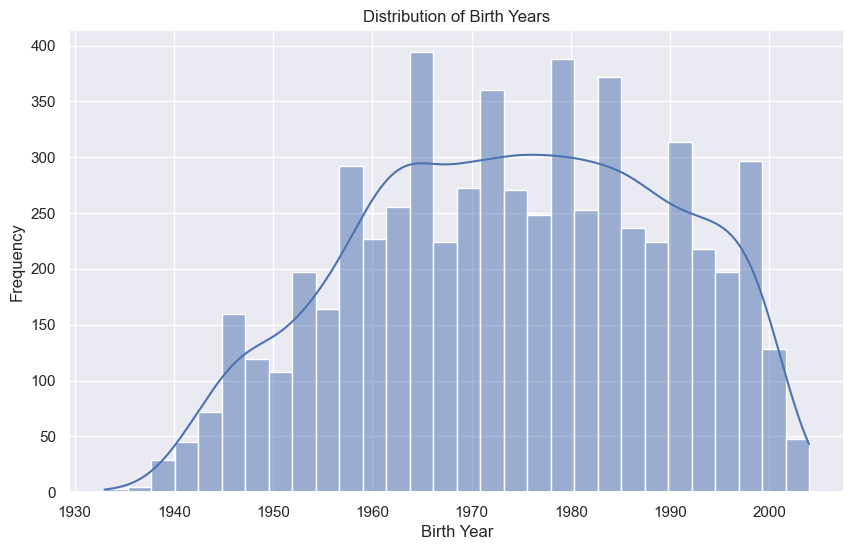

In [519]:
# Summary statistics for birth_year
birth_year_summary = cyclists_df['birth_year'].describe()
print("Summary Statistics for Birth Year:")
print(birth_year_summary)

# Visualize the distribution of birth_year
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['birth_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

### The `weight` attribute

Summary Statistics for Weight:
count       3078.0
mean     68.658869
std       6.348963
min           48.0
25%           64.0
50%           69.0
75%           73.0
max           94.0
Name: weight, dtype: Float64


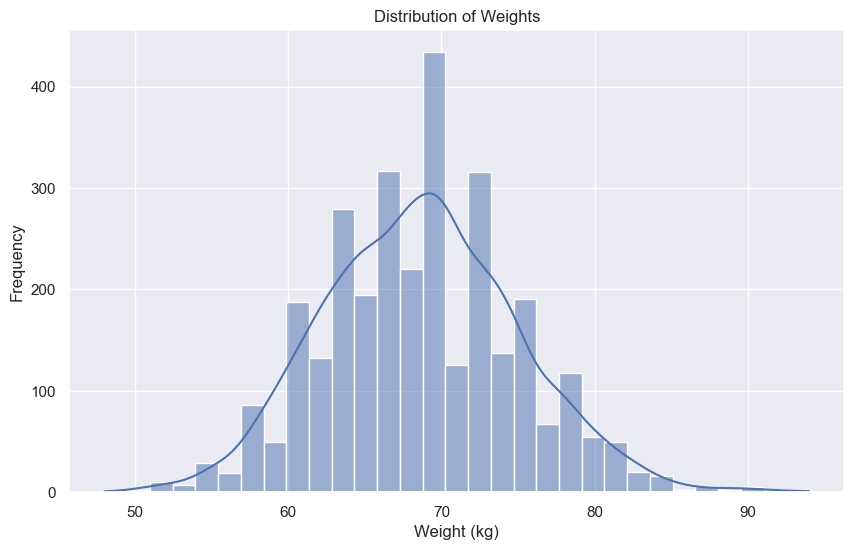

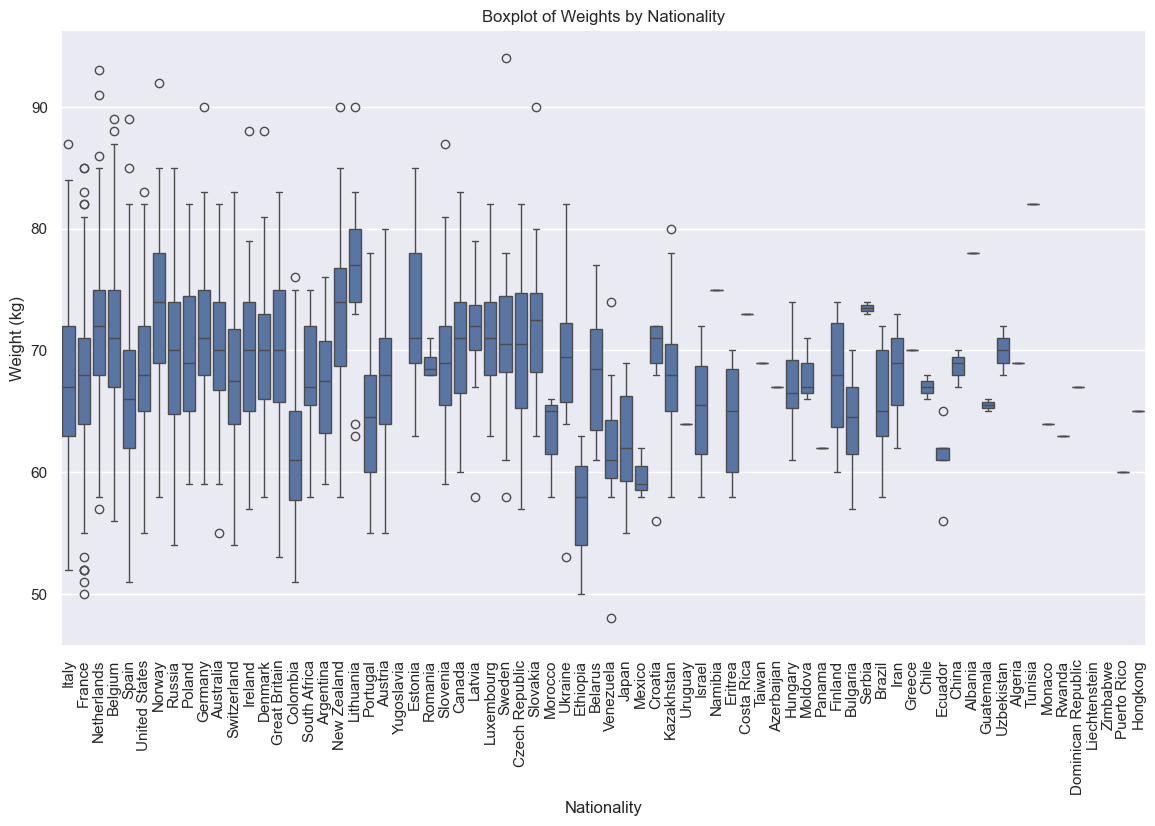

In [520]:
# Summary statistics for weight
weight_summary = cyclists_df['weight'].describe()
print("Summary Statistics for Weight:")
print(weight_summary)

# Visualize the distribution of weight
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['weight'].dropna(), bins='scott', kde=True)
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of weights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='weight', data=cyclists_df)
plt.title('Boxplot of Weights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.show()


# TODO: controllare gli outliers

### The `height` attribute

Summary Statistics for Height:
count        3143.0
mean     179.815145
std        6.443447
min           154.0
25%           175.0
50%           180.0
75%           184.0
max           204.0
Name: height, dtype: Float64


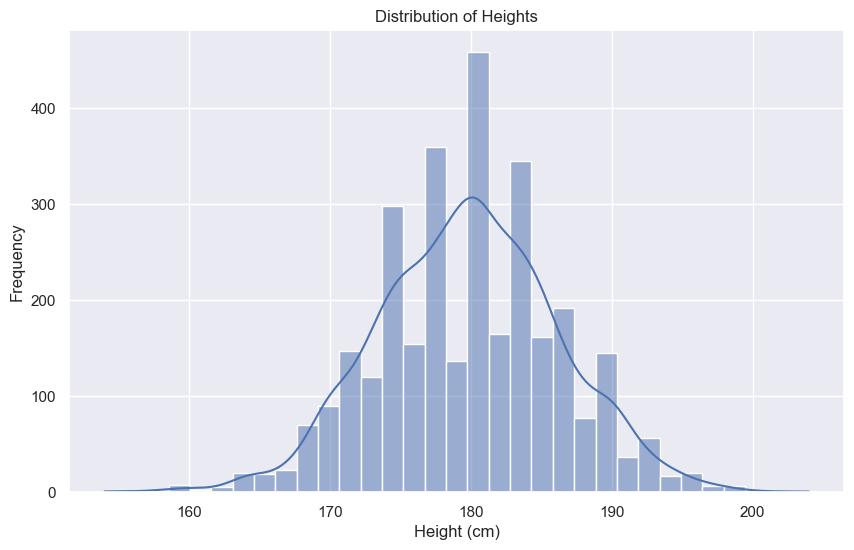

In [521]:
# Summary statistics for height
height_summary = cyclists_df['height'].describe()
print("Summary Statistics for Height:")
print(height_summary)

# Visualize the distribution of height
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['height'].dropna(), bins='scott', kde=True)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

### The `nationality` attribute

Summary Statistics for Nationality:
nationality
Italy                 1029
Spain                  872
Belgium                869
France                 741
Netherlands            380
                      ... 
Dominican Republic       1
Liechtenstein            1
Zimbabwe                 1
Puerto Rico              1
Hongkong                 1
Name: count, Length: 72, dtype: Int64


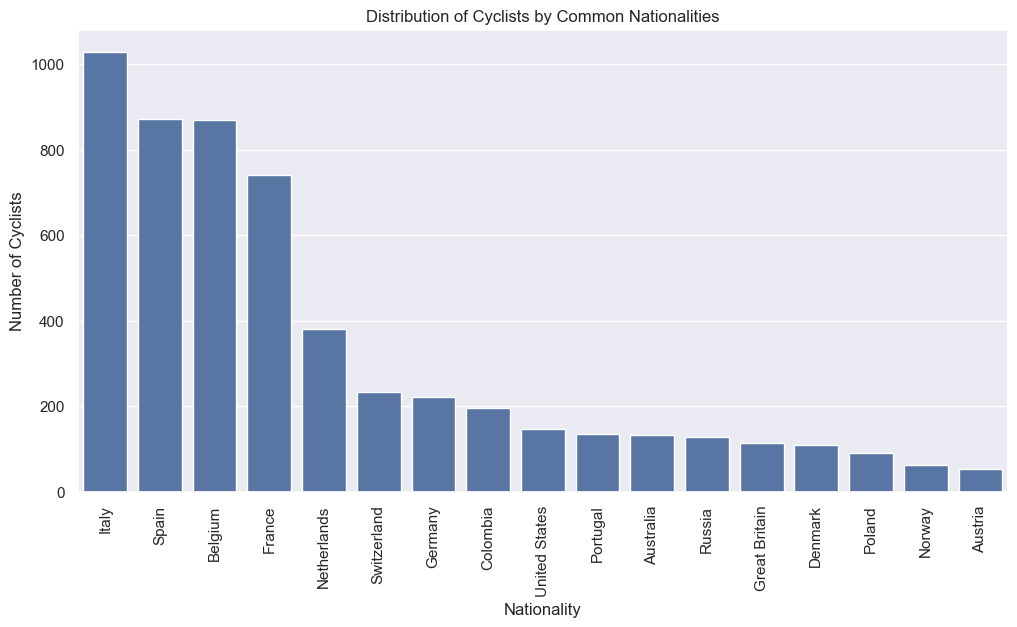

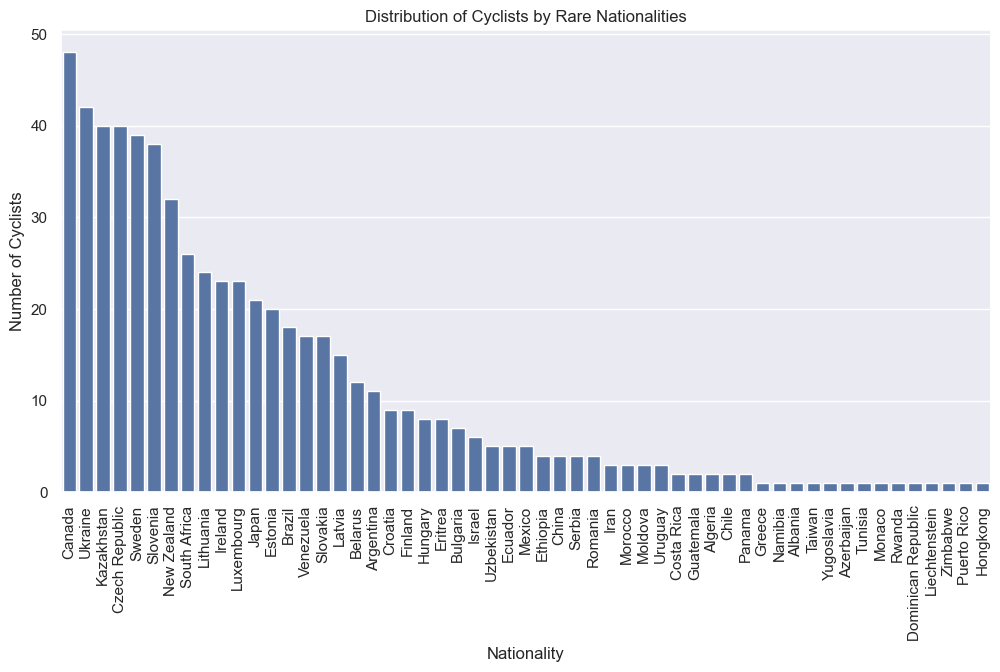

Distinct Nationalities:
<StringArray>
[             'Italy',             'France',        'Netherlands',
            'Belgium',              'Spain',      'United States',
                 <NA>,             'Norway',             'Russia',
             'Poland',            'Germany',          'Australia',
        'Switzerland',            'Ireland',            'Denmark',
      'Great Britain',           'Colombia',       'South Africa',
          'Argentina',        'New Zealand',          'Lithuania',
           'Portugal',            'Austria',         'Yugoslavia',
            'Estonia',            'Romania',           'Slovenia',
             'Canada',             'Latvia',         'Luxembourg',
             'Sweden',     'Czech Republic',           'Slovakia',
            'Morocco',            'Ukraine',           'Ethiopia',
            'Belarus',          'Venezuela',              'Japan',
             'Mexico',            'Croatia',         'Kazakhstan',
            'Uruguay',  

In [522]:
# Summary statistics for nationality
nationality_summary = cyclists_df['nationality'].value_counts()
print("Summary Statistics for Nationality:")
print(nationality_summary)

# Count the number of occurrences for each nationality
nationality_counts = cyclists_df['nationality'].value_counts()

# Separate nationalities with more than 50 counts and those with 50 or fewer counts
common_nationalities = nationality_counts[nationality_counts > 50]
rare_nationalities = nationality_counts[nationality_counts <= 50]

# Plot common nationalities
plt.figure(figsize=(12, 6))
sns.barplot(x=common_nationalities.index, y=common_nationalities.values)
plt.title('Distribution of Cyclists by Common Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Cyclists')
plt.xticks(rotation=90)
plt.show()

# Plot rare nationalities
plt.figure(figsize=(12, 6))
sns.barplot(x=rare_nationalities.index, y=rare_nationalities.values)
plt.title('Distribution of Cyclists by Rare Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Cyclists')
plt.xticks(rotation=90)
plt.show()

# Show distinct nationalities
distinct_nationalities = cyclists_df['nationality'].unique()
print("Distinct Nationalities:")
print(distinct_nationalities)
# TODO: attenzione! c'è 'nan' come nazione, però lo abbiamo risolto più avanti

# Nationalities with low frequency
rare_nationalities = nationality_summary[nationality_summary <= 2]
print("Nationalities with Frequency less or equal than 2:")
print(rare_nationalities)

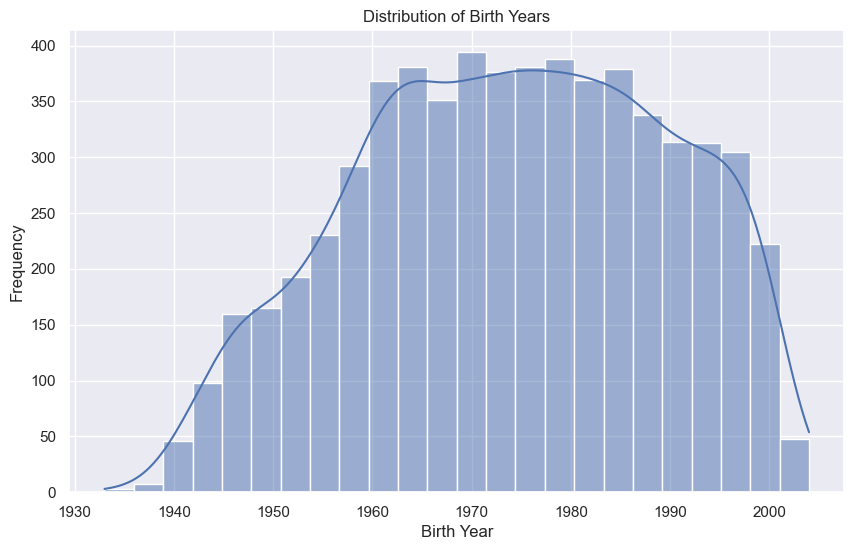

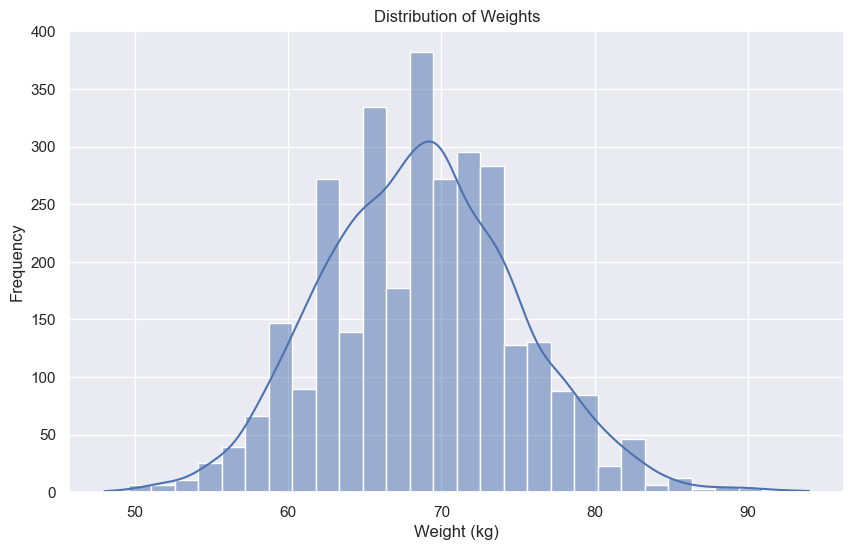

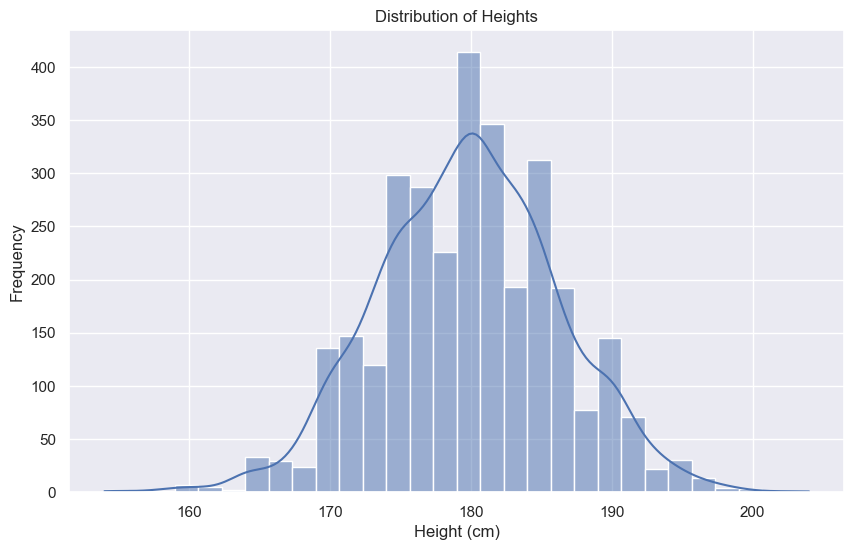

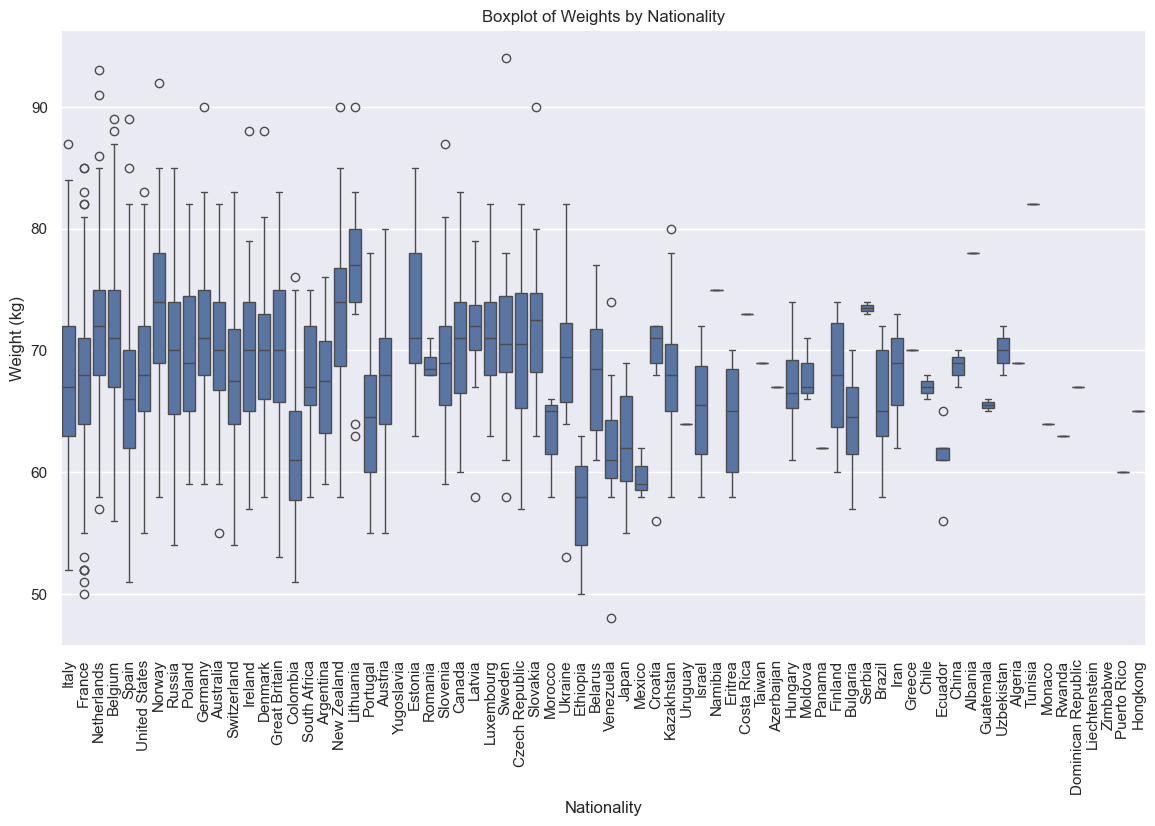

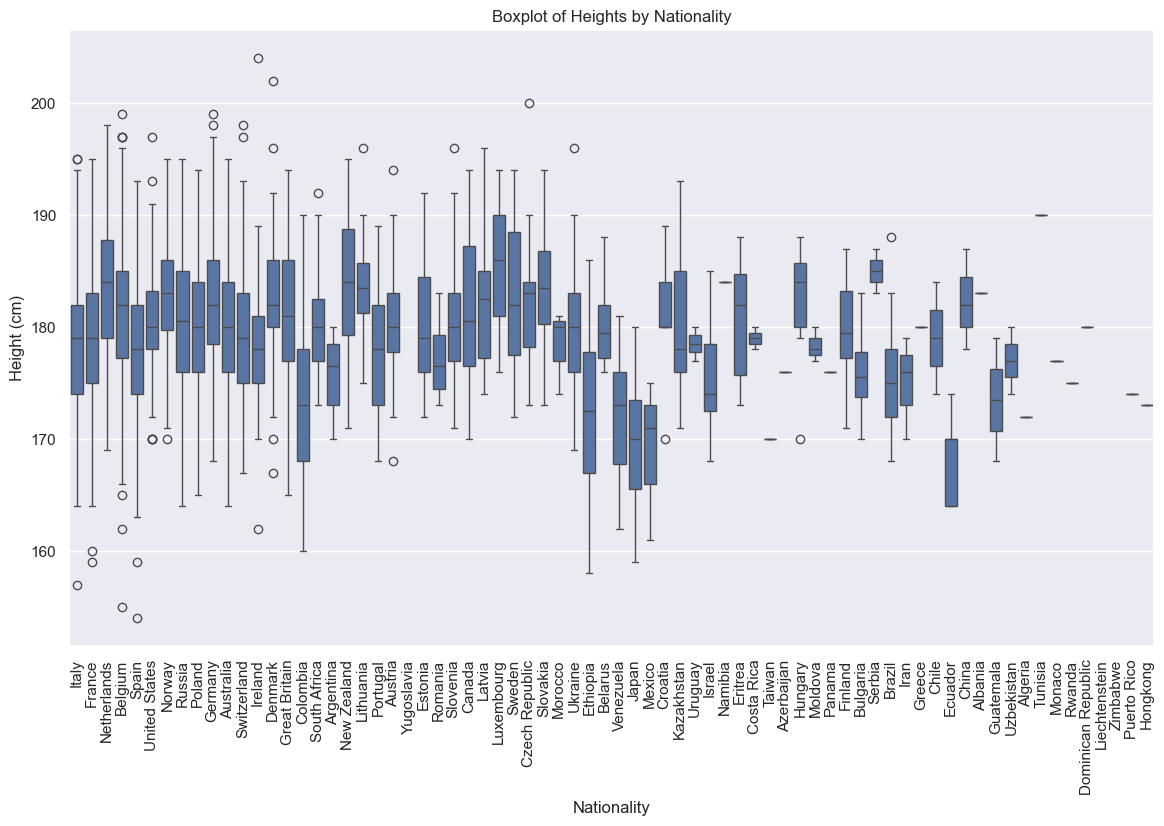

In [523]:
# Distribution of birth years
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['birth_year'].dropna(), bins='scott', kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

# Distribution of weights
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Distribution of heights
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of weights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='weight', data=cyclists_df)
plt.title('Boxplot of Weights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.show()

# Boxplot of heights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='height', data=cyclists_df)
plt.title('Boxplot of Heights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Height (cm)')
plt.xticks(rotation=90)
plt.show()

# Data Understanding Miscellanea

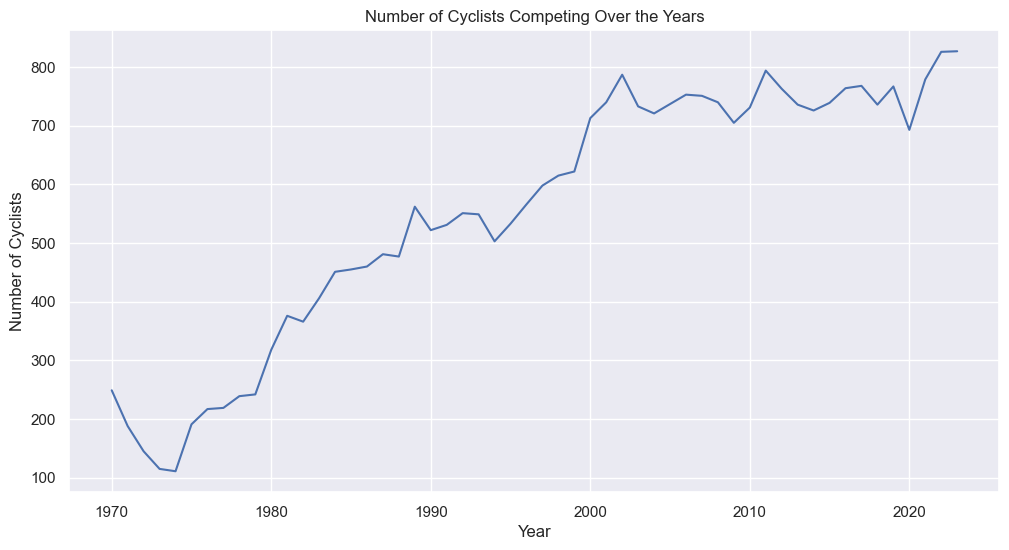

In [524]:
# Create a new column 'year' extracted from the 'date', of type datetime
races_df['year'] = pd.to_datetime(races_df['date']).dt.year

# Count the number of cyclists racing in each year
cyclists_per_year = races_df.groupby('year')['cyclist'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=cyclists_per_year.index, y=cyclists_per_year.values)
plt.title('Number of Cyclists Competing Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cyclists')
plt.show()

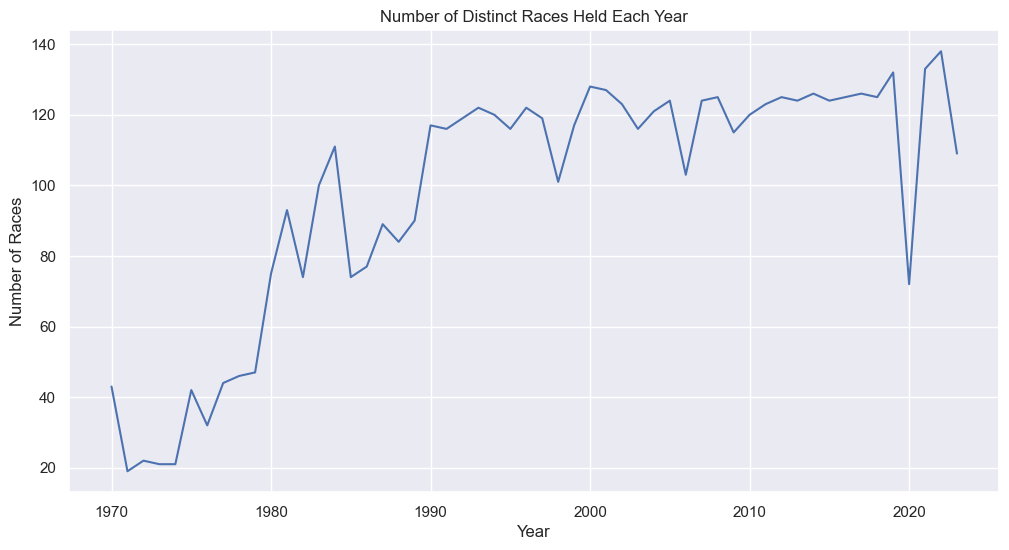

In [525]:
# Count the number of distinct races held in each year
races_per_year = races_df.groupby('year')['_url'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=races_per_year.index, y=races_per_year.values)
plt.title('Number of Distinct Races Held Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.show()

Observations: 2020 (covid)

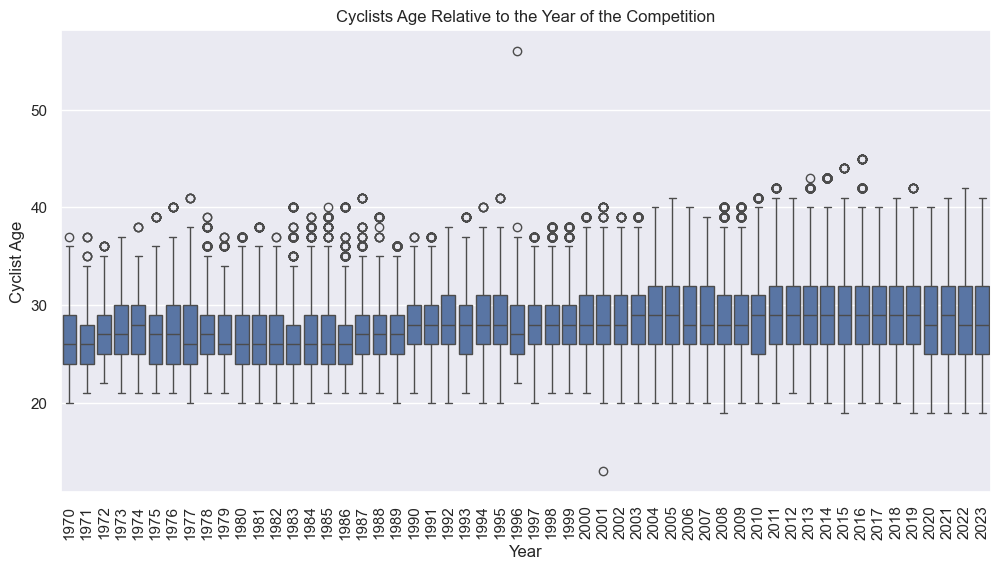

In [526]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='cyclist_age', data=races_df)
plt.title('Cyclists Age Relative to the Year of the Competition')
plt.xlabel('Year')
plt.ylabel('Cyclist Age')
plt.xticks(rotation=90)
plt.show()

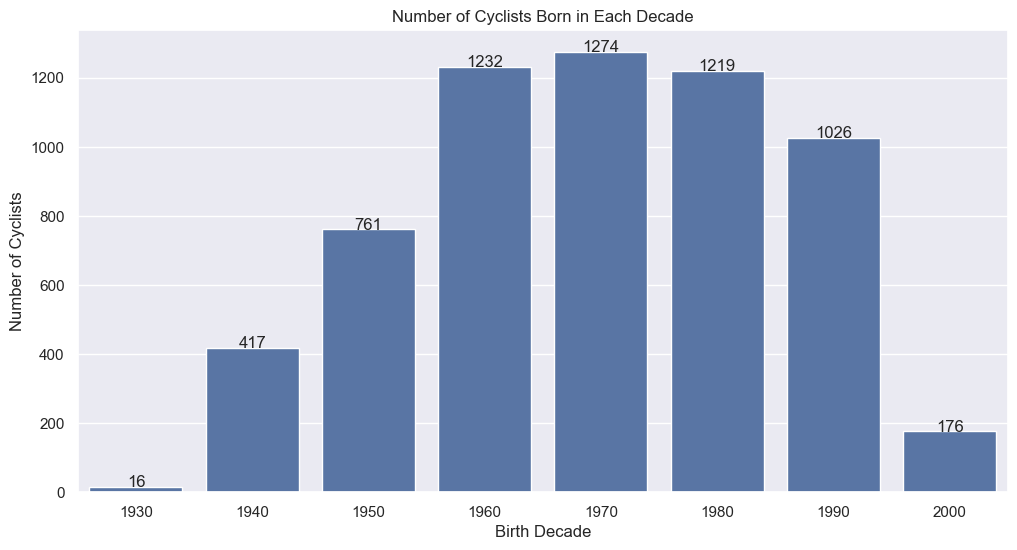

In [527]:
copy = cyclists_df['birth_year'].dropna()

# Extract the first three digits of the birth year and convert to integer
birth_decades = (copy // 10 * 10).astype(int)

# Count the number of occurrences for each decade
birth_decade_counts = birth_decades.value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=birth_decade_counts.index, y=birth_decade_counts.values)
plt.title('Number of Cyclists Born in Each Decade')
plt.xlabel('Birth Decade')
plt.ylabel('Number of Cyclists')

# Show the value on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height().astype("int64")}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

## Correlation

In [528]:
from transformations.values import remove_from_column
from dataunderstanding import correlations
from transformations import center_and_scale, drop_boolean

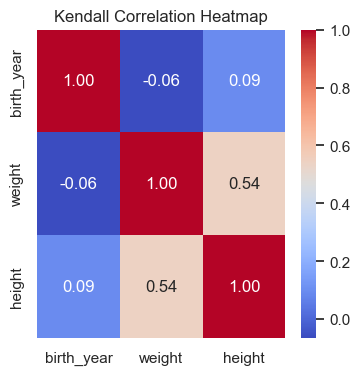

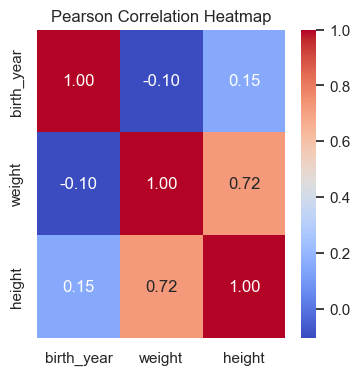

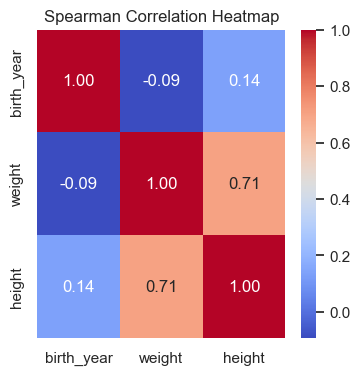

In [529]:

cyclists_df_numeric_only = cyclists_df.select_dtypes(include=['number'])

normalized_dataset, normalization_scalers_dataset = center_and_scale(cyclists_df_numeric_only)
cyclists_correlations = correlations(normalized_dataset)

plt.figure(figsize=(4, 4))
sns.heatmap(cyclists_correlations[cyclists_correlations['correlation_type'] == 'kendall'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall Correlation Heatmap')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(cyclists_correlations[cyclists_correlations['correlation_type'] == 'pearson'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(cyclists_correlations[cyclists_correlations['correlation_type'] == 'spearman'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()




# Data Unserstanding for the Races dataset

In [530]:

# Display basic information about the dataset
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [531]:
# Display the first few rows of the dataset
races_df.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta,year
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0,1978
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0,1978
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0,1978
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0,1978
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0,1978


## Type Casting

In [532]:
print(f"Number of occurrences of points that are not .0: {count_non_zero_decimal_values(races_df, 'points')}")
print(f"Number of occurrences of uci_points that are not .0: {count_non_zero_decimal_values(races_df, 'uci_points')}")
print(f"Number of occurrences of profile that are not .0: {count_non_zero_decimal_values(races_df, 'profile')}")
print(f"Number of occurrences of average_temperature that are not .0: {count_non_zero_decimal_values(races_df, 'average_temperature')}")
print(f"Number of occurrences of cyclist_age that are not .0: {count_non_zero_decimal_values(races_df, 'cyclist_age')}")
print(f"Number of occurrences of delta that are not .0: {count_non_zero_decimal_values(races_df, 'delta')}")


Number of occurrences of points that are not .0: 0
Number of occurrences of uci_points that are not .0: 0
Number of occurrences of profile that are not .0: 0
Number of occurrences of average_temperature that are not .0: 0
Number of occurrences of cyclist_age that are not .0: 0
Number of occurrences of delta that are not .0: 0


In [533]:
# TYPE CASTINGS


races_df['_url'] = races_df['_url'].astype('string')
races_df['name'] = races_df['name'].astype('string')
races_df['cyclist'] = races_df['cyclist'].astype('string')
races_df['cyclist_team'] = races_df['cyclist_team'].astype('string')


races_df['points'] = races_df['points'].round().astype('Int64')
races_df['uci_points'] = races_df['uci_points'].round().astype('Int64')
races_df['profile'] = races_df['profile'].round().astype('Int64')
races_df['cyclist_age'] = races_df['cyclist_age'].round().astype('Int64')
races_df['average_temperature'] = races_df['average_temperature'].round().astype('Int64')
races_df['delta'] = races_df['delta'].round().astype('Int64')




# Cast length and climb_total to Int64
races_df['length'] = races_df['length'].round().astype('Int64')
races_df['climb_total'] = races_df['climb_total'].round().astype('Int64')

races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   _url                 589865 non-null  string
 1   name                 589865 non-null  string
 2   points               589388 non-null  Int64 
 3   uci_points           251086 non-null  Int64 
 4   length               589865 non-null  Int64 
 5   climb_total          442820 non-null  Int64 
 6   profile              441671 non-null  Int64 
 7   startlist_quality    589865 non-null  int64 
 8   average_temperature  29933 non-null   Int64 
 9   date                 589865 non-null  object
 10  position             589865 non-null  int64 
 11  cyclist              589865 non-null  string
 12  cyclist_age          589752 non-null  Int64 
 13  is_tarmac            589865 non-null  bool  
 14  is_cobbled           589865 non-null  bool  
 15  is_gravel            589865 non-nu

## Semantic analysis of the attributes

We now analyze the semantic and statistical properties of the attributes in the dataset to understand the data better, and check for any anomalies.

In [534]:
races_df.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta,year
count,589388.0,251086.0,589865.0,442820.0,441671.0,589865.000000,29933.0,589865.000000,589752.0,589865.0,589865.000000
mean,89.221635,74.601547,166776.180584,2330.469215,2.611611,1101.161178,21.731768,74.219491,28.486208,418.292794,2006.166425
std,54.43533,100.947962,64545.605664,1375.710722,1.491741,380.586928,5.884761,48.404023,3.855631,842.961596,11.477521
min,18.0,6.0,1000.0,2.0,1.0,115.000000,10.0,0.000000,13.0,-6906.0,1970.000000
25%,50.0,16.0,152500.0,1309.0,1.0,844.000000,17.0,32.000000,26.0,10.0,1999.000000
50%,80.0,60.0,178200.0,2255.0,2.0,988.000000,22.0,70.000000,28.0,156.0,2008.000000
75%,100.0,100.0,203500.0,3273.0,4.0,1309.000000,26.0,112.000000,31.0,624.0,2015.000000
max,350.0,800.0,338000.0,6974.0,5.0,2047.000000,36.0,209.000000,56.0,61547.0,2023.000000


From this description we immeiately observe:
- negative delta values: a clear anomaly
- the youngest cyclist is 13 years old
- profile ranges from 1 to 5
   



todo: togliere il 13enne perché outlier?

todo: cosa vuol dire profile 5.0? nel pdf ci sono solo 4 profili

we notice a negative delta.

In [535]:

underage = races_df[races_df['cyclist_age'] < 18 ]
underage

# TODO: rimuoverlo

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta,year
294489,san-sebastian/2001/result,Clasica Ciclista San Sebastian,225,<NA>,227000,<NA>,2,1048,<NA>,2001-08-11 05:28:57,91,plamen-stanev,13,False,False,False,<NA>,663,2001


In [536]:
# Count the number of negative values in the delta column
negative_delta_count = (races_df['delta'] < 0).sum()
print(f"Number of negative values in delta: {negative_delta_count}")

Number of negative values in delta: 86


Negative deltas is clearly an error, since the time cannot be negative. We will remove them, since they are only 86 values.

In [537]:
# Rimuovi i valori negativi di delta
races_df = races_df[races_df['delta'] >= 0]

# Verifica che non ci siano più valori negativi di delta
negative_delta_count = (races_df['delta'] < 0).sum()
print(f"Number of negative values in delta after removal: {negative_delta_count}")

Number of negative values in delta after removal: 0



---

Each record refering to the same race should have the same values as the other records refering to the same race (except for the attributes specific to the cyclist, such as `cyclist_age`, `delta`, etc). Let's check if this is true.

In [538]:
# TODO: fare questo controllo anche dopo aver fatto transfdormations

# we only want to compare the columns related to the race, not the cyclist
columns_to_compare = ['length', 'climb_total', 'points', 'uci_points', 'profile', 'average_temperature', 'startlist_quality', 'name']

# Group by '_url' and check if the attributes are equal within each group
mismatched_records = races_df.groupby('_url').filter(lambda group: not group[columns_to_compare].apply(lambda x: (x == x.iloc[0]).all()).all())

# Display the mismatched records
print("Records with mismatched attributes:")
print(mismatched_records)


Records with mismatched attributes:
Empty DataFrame
Columns: [_url, name, points, uci_points, length, climb_total, profile, startlist_quality, average_temperature, date, position, cyclist, cyclist_age, is_tarmac, is_cobbled, is_gravel, cyclist_team, delta, year]
Index: []


No mismatch found, as expected.

---


Let's check if delta and position are semantically coherent.

In [539]:
# Check that for records where position is 0, delta is also 0
position_zero_delta_check = (races_df[races_df['position'] == 0]['delta'] == 0).all()
print(f"All records where position is 0 have delta as 0: {position_zero_delta_check}")

# Check that for records where delta is 0, position is also 0
delta_zero_position_check = (races_df[races_df['delta'] == 0]['position'] == 0).all()
print(f"All records where delta is 0 have position as 0: {delta_zero_position_check}")



All records where position is 0 have delta as 0: True
All records where delta is 0 have position as 0: False


as expected, when position is 0 -> delta zero

on the contrary, when delta is 0, is possible that the position is NOT 0, because many people can arrive at the same time, especially in big races

todo: rimuovere il tempo di inizio dalla data, perché, come dice il pdf, è irrelevant & noisy

Find records where climb_total is greater than length: if found, it would be an anomaly, since the total climb cannot be greater than the length of the race.

In [540]:
invalid_records = races_df[races_df['climb_total'] > races_df['length']]

print("Records where climb_total is greater than length:")
print(invalid_records)

Records where climb_total is greater than length:
Empty DataFrame
Columns: [_url, name, points, uci_points, length, climb_total, profile, startlist_quality, average_temperature, date, position, cyclist, cyclist_age, is_tarmac, is_cobbled, is_gravel, cyclist_team, delta, year]
Index: []


In [541]:
# check if, for every unique _url, the position value i unique inside that url

# Group by '_url' and check if the 'position' values are unique within each group
position_unique_check = races_df.groupby('_url')['position'].nunique() == races_df.groupby('_url')['position'].count()

# Check if all values are True
all_positions_unique = position_unique_check.all()

print(f"All positions are unique within each _url: {all_positions_unique}")

All positions are unique within each _url: True


## Analysis of single attributes

### The `is_gravel`, `is_tarmac`, `is_cobbled` attributes

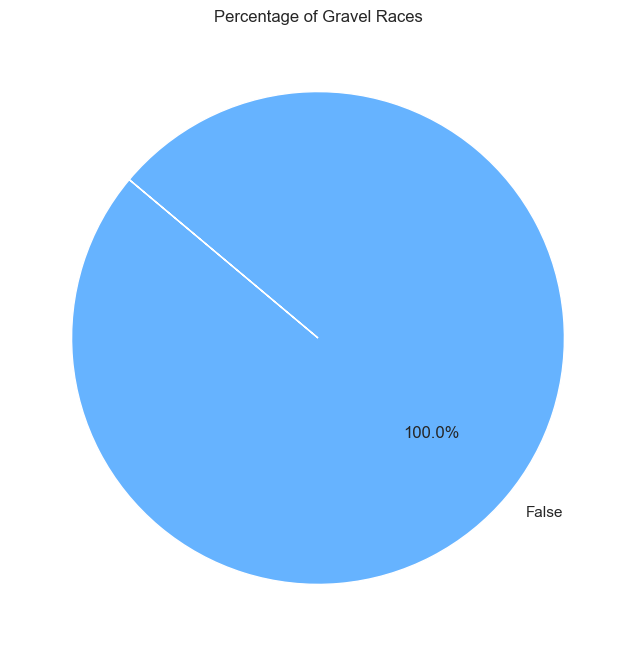

In [542]:
# Calculate the percentage of True and False values in is_gravel
is_gravel_counts = races_df['is_gravel'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(is_gravel_counts, labels=is_gravel_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Gravel Races')
plt.show()

since all the values are false, we consider dropping the column ...

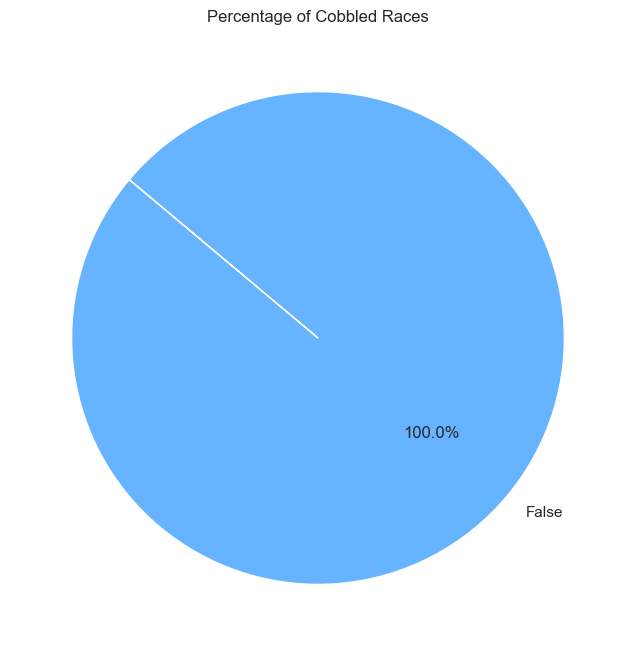

In [543]:
# Calculate the percentage of True and False values in is_cobbled
is_cobbled_counts = races_df['is_cobbled'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(is_cobbled_counts, labels=is_cobbled_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Cobbled Races')
plt.show()

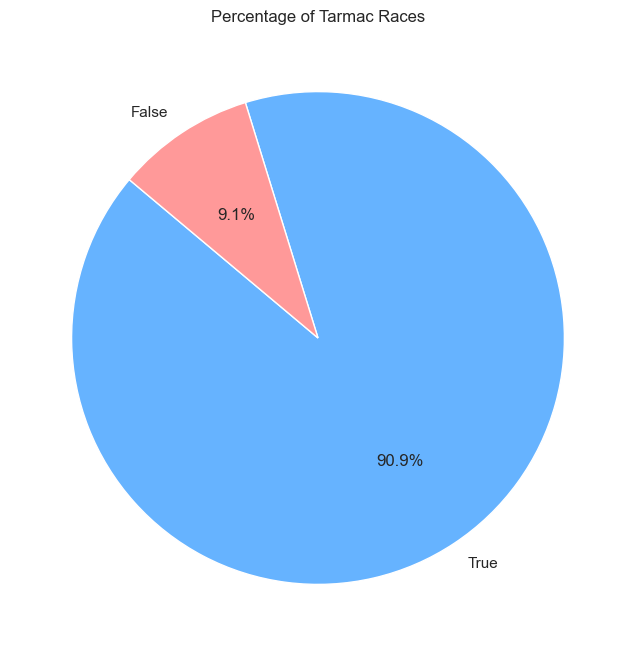

In [544]:
# Calculate the percentage of True and False values in is_tarmac
is_tarmac_counts = races_df['is_tarmac'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(is_tarmac_counts, labels=is_tarmac_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Tarmac Races')
plt.show()

In [545]:
# TODO: osservazioni su questi 3 attributi



### Points attributes

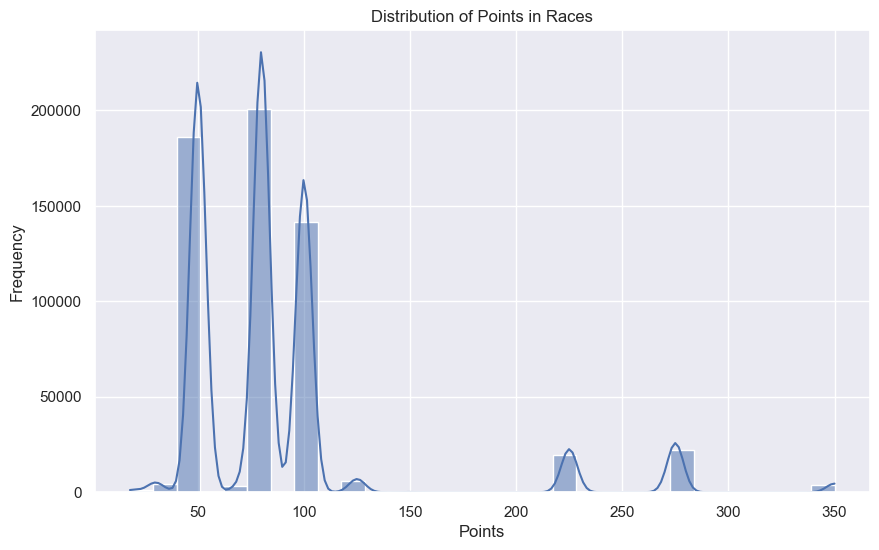

In [546]:
# Distribution of points in races
plt.figure(figsize=(10, 6))
sns.histplot(races_df['points'].dropna(), bins=30, kde=True)
plt.title('Distribution of Points in Races')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()


### UCI points attribute

### length attribute

### climb_total attribute

### Profile attribute

<Axes: xlabel='profile'>

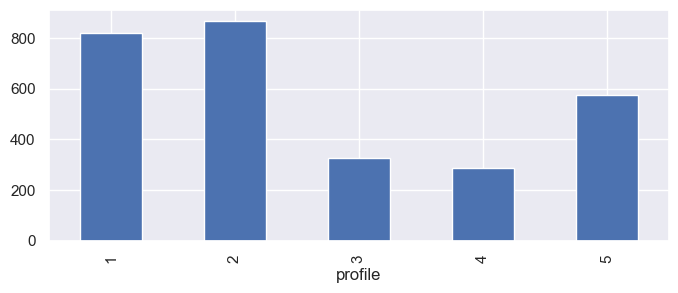

In [547]:
# Count the number of distinct races for each profile value
distinct_races_per_profile = races_df.groupby('profile')['_url'].nunique()
distinct_races_per_profile.plot(kind='bar', figsize=(8, 3))

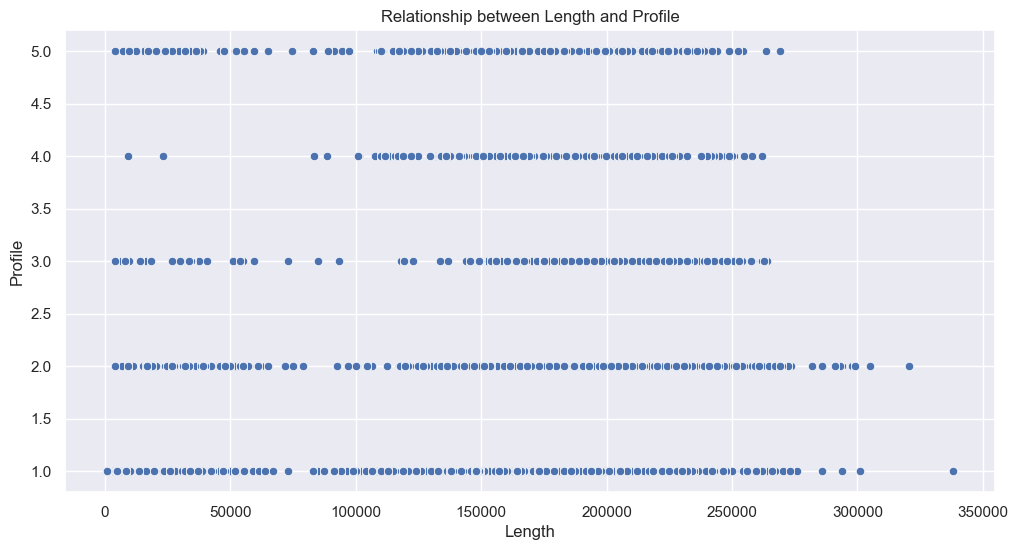

In [548]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='length', y='profile', data=races_df)
plt.title('Relationship between Length and Profile')
plt.xlabel('Length')
plt.ylabel('Profile')
plt.show()

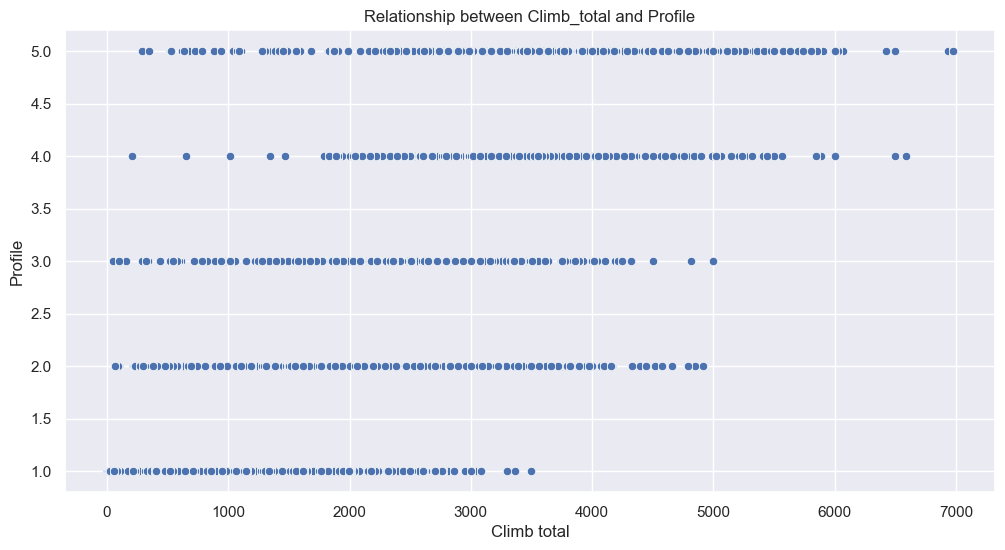

In [549]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='climb_total', y='profile', data=races_df)
plt.title('Relationship between Climb_total and Profile')
plt.xlabel('Climb total')
plt.ylabel('Profile')
plt.show()

### startlist_quality attribute

### average_temperature attribute

### date attribute

### position attribute

### Cyclist Age attribute

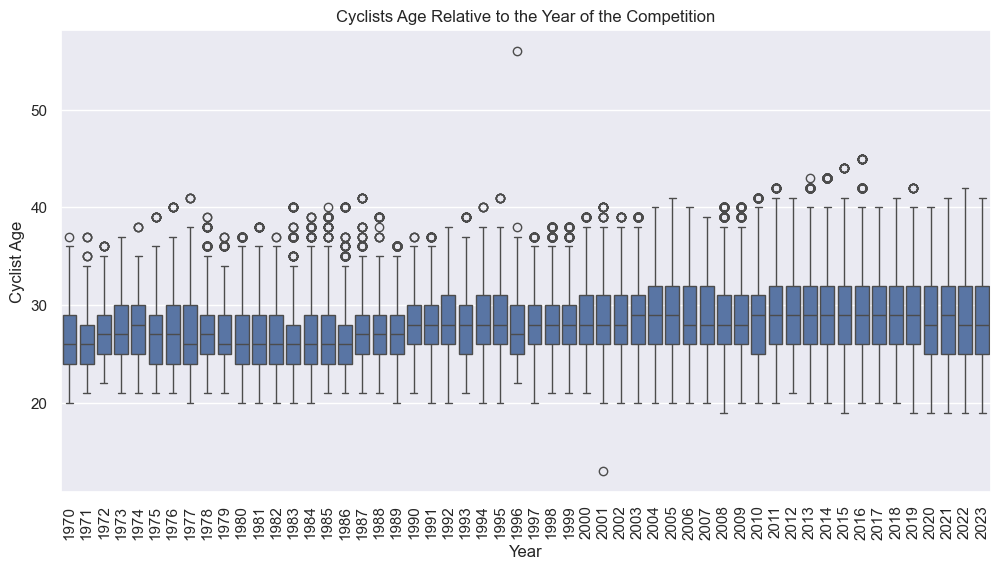

In [550]:
# Create a new column 'year' extracted from the 'date', of type datetime
races_df['year'] = pd.to_datetime(races_df['date']).dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='cyclist_age', data=races_df)
plt.title('Cyclists Age Relative to the Year of the Competition')
plt.xlabel('Year')
plt.ylabel('Cyclist Age')
plt.xticks(rotation=90)
plt.show()

# TODO: outliers!

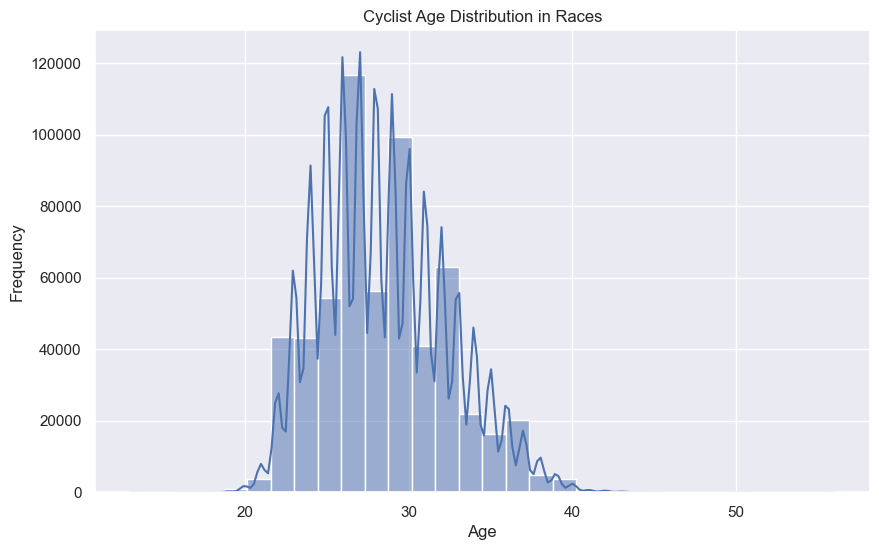

In [551]:

# Cyclist age distribution in races
plt.figure(figsize=(10, 6))
sns.histplot(races_df['cyclist_age'].dropna(), bins=30, kde=True)
plt.title('Cyclist Age Distribution in Races')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### cyclist_team attribute

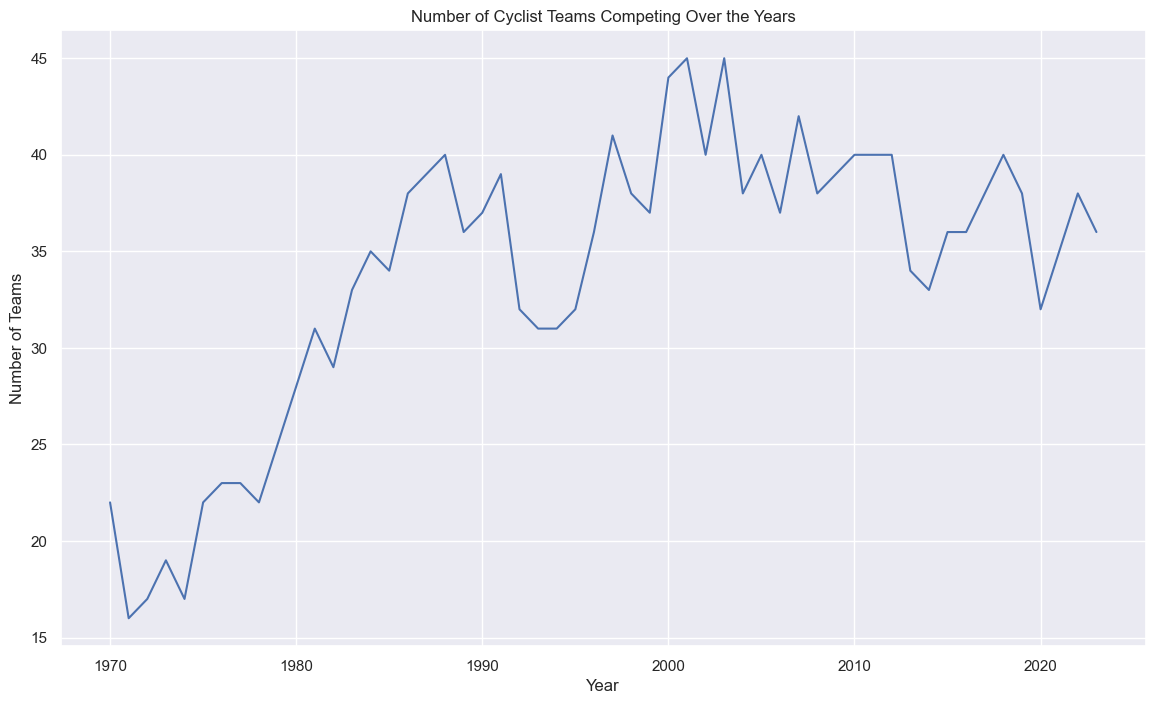

In [552]:
# Count the number of different cyclist teams competing each year
teams_per_year = races_df.groupby('year')['cyclist_team'].nunique()

plt.figure(figsize=(14, 8))
sns.lineplot(x=teams_per_year.index, y=teams_per_year.values)
plt.title('Number of Cyclist Teams Competing Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Teams')
plt.show()

### delta attribute

## Correlation

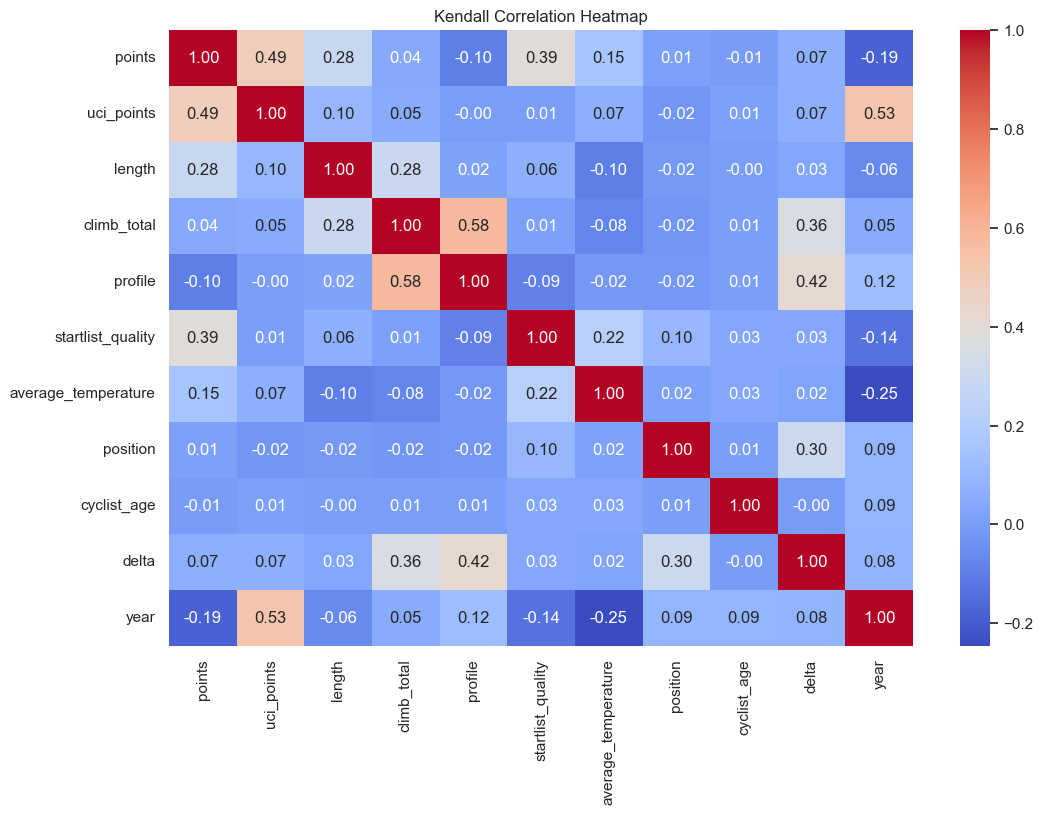

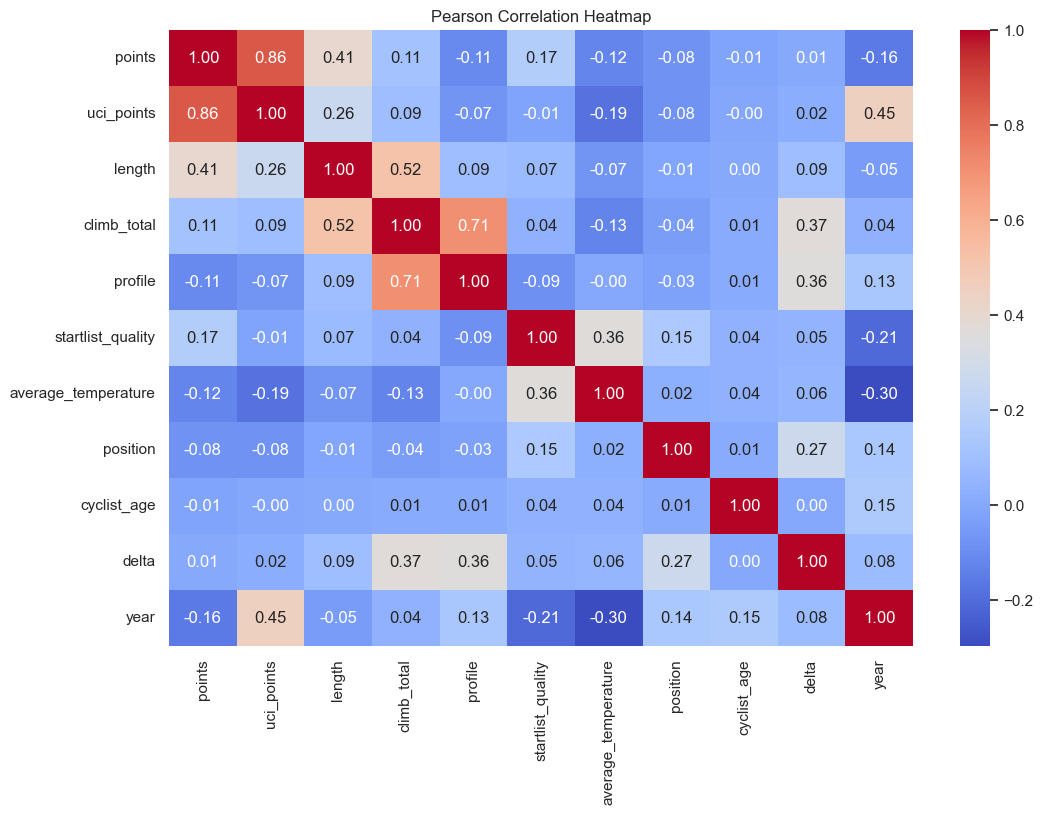

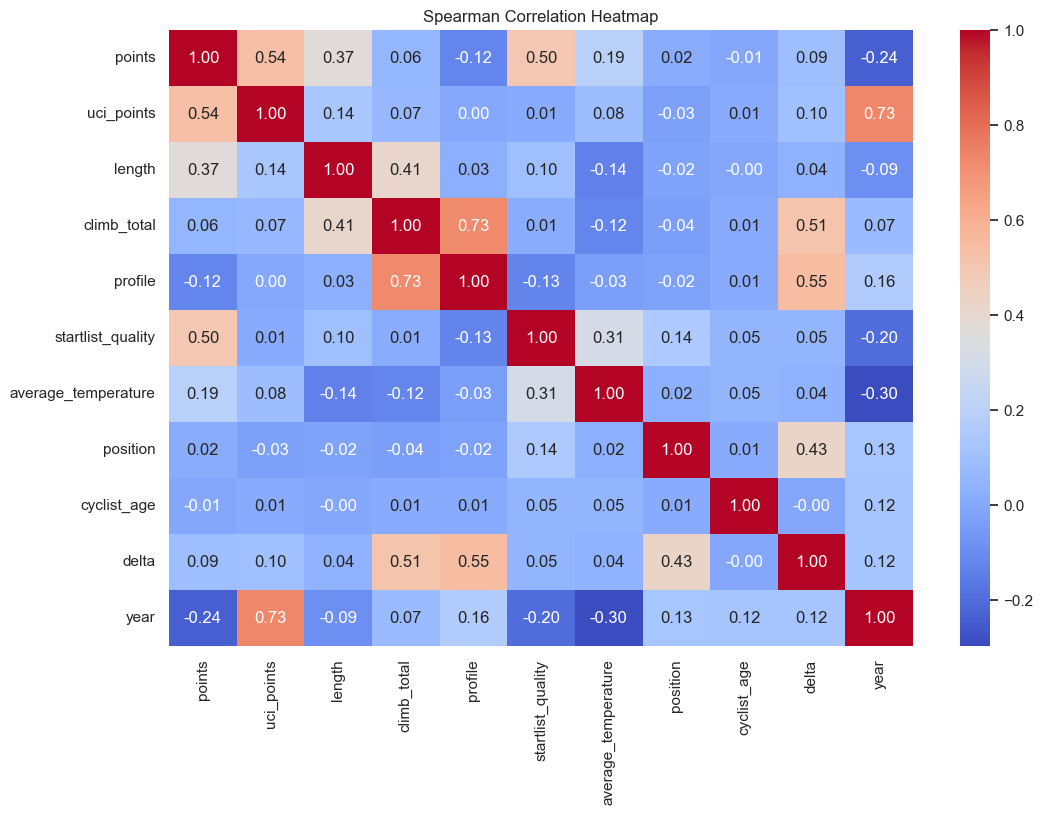

In [553]:

races_df_numeric_only = races_df.select_dtypes(include=['number'])

normalized_dataset, normalization_scalers_dataset = center_and_scale(races_df_numeric_only)
races_correlations = correlations(normalized_dataset)

plt.figure(figsize=(12, 8))
sns.heatmap(races_correlations[races_correlations['correlation_type'] == 'kendall'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(races_correlations[races_correlations['correlation_type'] == 'pearson'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(races_correlations[races_correlations['correlation_type'] == 'spearman'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()




## More observations

# Data Transformation for the Cyclists dataset

## Attributes

## BMI feature

In [554]:
def bmi_calculator(weight, height):
    height = height / 100
    bmi = weight / math.pow(height, 2)
    return round(bmi, 1)


# Calculate BMI only for rows where both 'weight' and 'height' are not NA
cyclists_df['BMI'] = cyclists_df.apply(
    lambda row: bmi_calculator(row['weight'], row['height']) 
    if pd.notna(row['weight']) and pd.notna(row['height']) 
    else pd.NA,
    axis=1
).astype('Float64', errors='ignore')

cyclists_df.describe()

,birth_year,weight,height,BMI
count,6121.0,3078.0,3143.0,3071.0
mean,1974.071884,68.658869,179.815145,21.21169
std,15.535834,6.348963,6.443447,1.367685
min,1933.0,48.0,154.0,16.4
25%,1962.0,64.0,175.0,20.3
50%,1974.0,69.0,180.0,21.1
75%,1987.0,73.0,184.0,22.1
max,2004.0,94.0,204.0,27.8


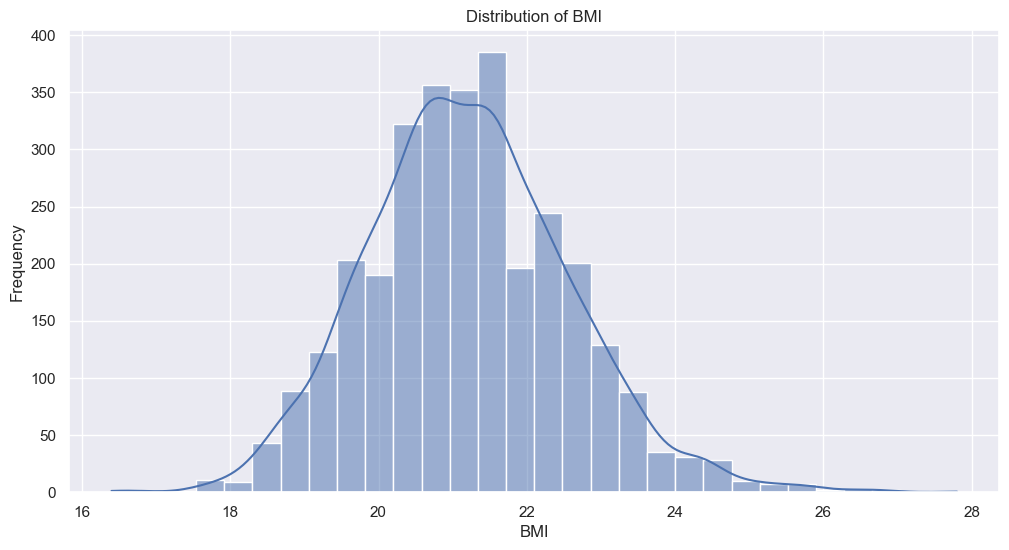

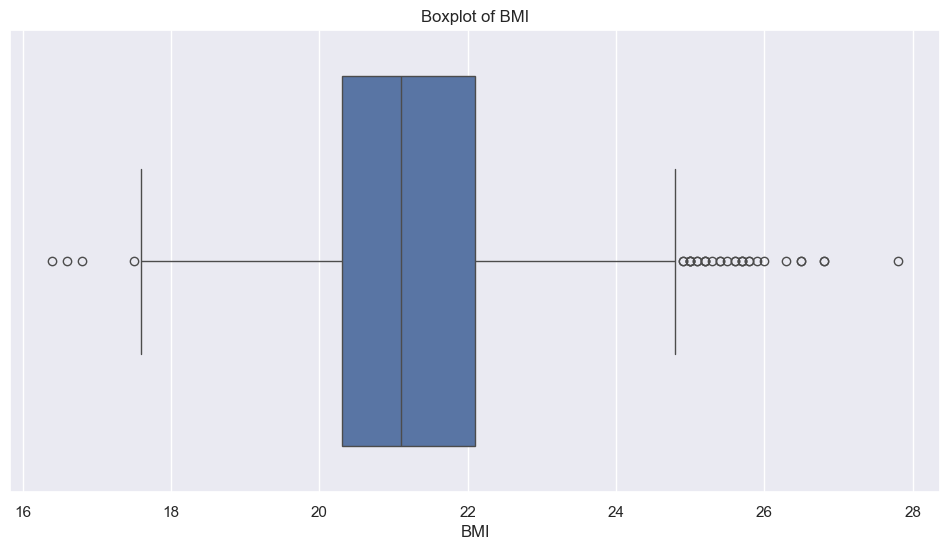

In [555]:
# Histogram of BMI
plt.figure(figsize=(12, 6))
sns.histplot(cyclists_df['BMI'].dropna(), bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Boxplot of BMI
plt.figure(figsize=(12, 6))
sns.boxplot(x=cyclists_df['BMI'].dropna())
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

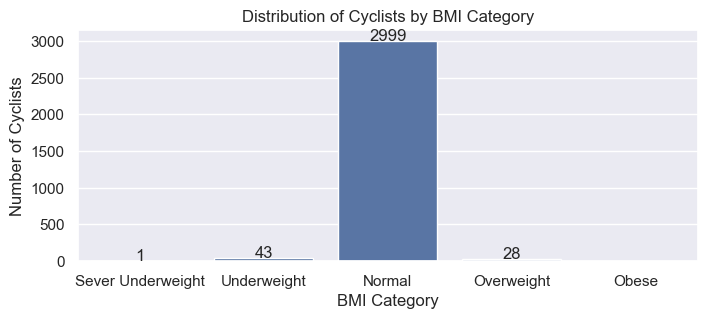

In [556]:
labels = ['Sever Underweight', 'Underweight', 'Normal', 'Overweight', 'Obese']

# Categorize cyclists based on their BMI
bmi_categories = pd.cut(cyclists_df['BMI'], bins=[0, 16.5, 18.5, 25, 30.1, float('inf')], labels=labels, right=False)
bmi_category_counts = bmi_categories.value_counts().reindex(labels, fill_value=0)

# Plot the distribution of BMI categories
plt.figure(figsize=(8, 3))
sns.countplot(x=bmi_categories, order=labels)
plt.title('Distribution of Cyclists by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cyclists')

# Show the value on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

Most of the cyclists have a normal BMI, so this is not very interesting. We need to make this more granular.

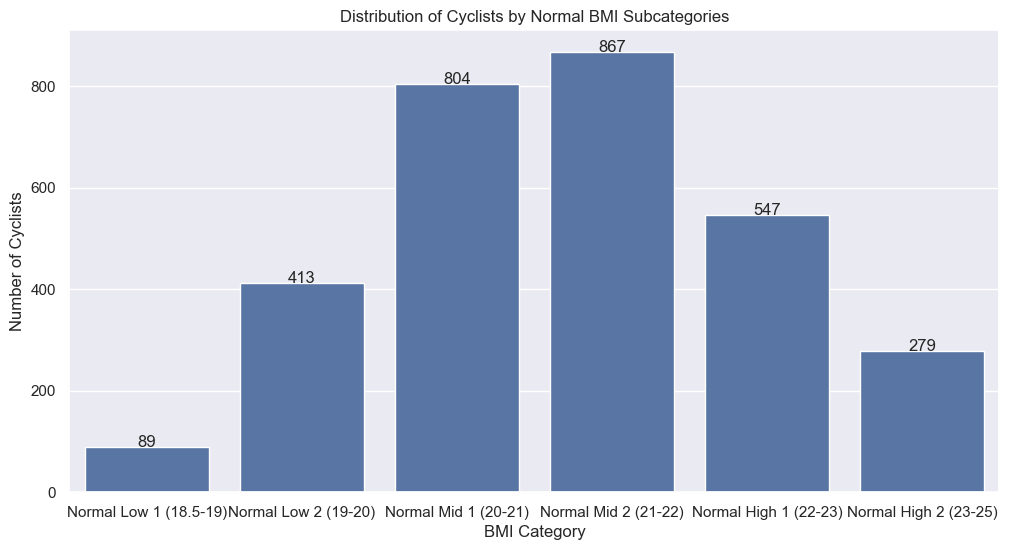

In [557]:
# Define granular Normal BMI categories
labels = [
    'Normal Low 1 (18.5-19)',
    'Normal Low 2 (19-20)',
    'Normal Mid 1 (20-21)',
    'Normal Mid 2 (21-22)',
    'Normal High 1 (22-23)',
    'Normal High 2 (23-25)'
]
bins = [18.5, 19, 20, 21, 22, 23, 25]

# Categorize cyclists based on the new Normal BMI categories
bmi_categories = pd.cut(
    cyclists_df['BMI'],
    bins=bins,
    labels=labels,
    right=False
)
bmi_category_counts = bmi_categories.value_counts().reindex(labels, fill_value=0)

# Plot the distribution of Normal BMI categories
plt.figure(figsize=(12, 6))
sns.countplot(x=bmi_categories, order=labels)
plt.title('Distribution of Cyclists by Normal BMI Subcategories')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cyclists')

# Show the value on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline'
    )

plt.show()

## races_participated attribute

In [558]:
# Count the number of participations for each cyclist in races_df
participation_counts = races_df['cyclist'].value_counts()

# Map the participation counts to the cyclists_df
cyclists_df['races_participated'] = cyclists_df['_url'].map(participation_counts).fillna(0).astype(int)

# Display the updated cyclists_df
cyclists_df[['name', 'races_participated']].head()

,name,races_participated
0,Bruno Surra,1
1,Gérard Rué,222
2,Jan Maas,49
3,Nathan Van Hooydonck,161
4,José Félix Parra,48


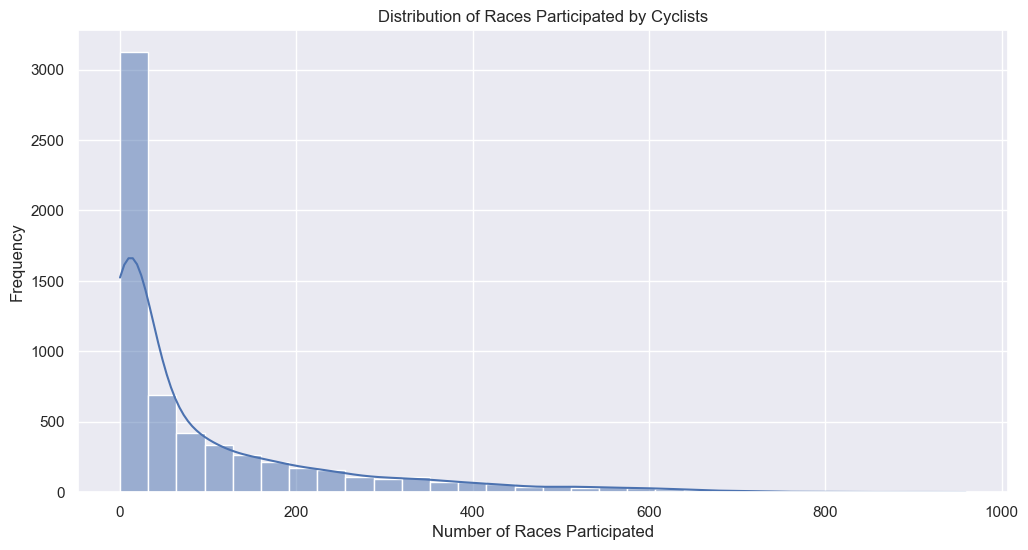

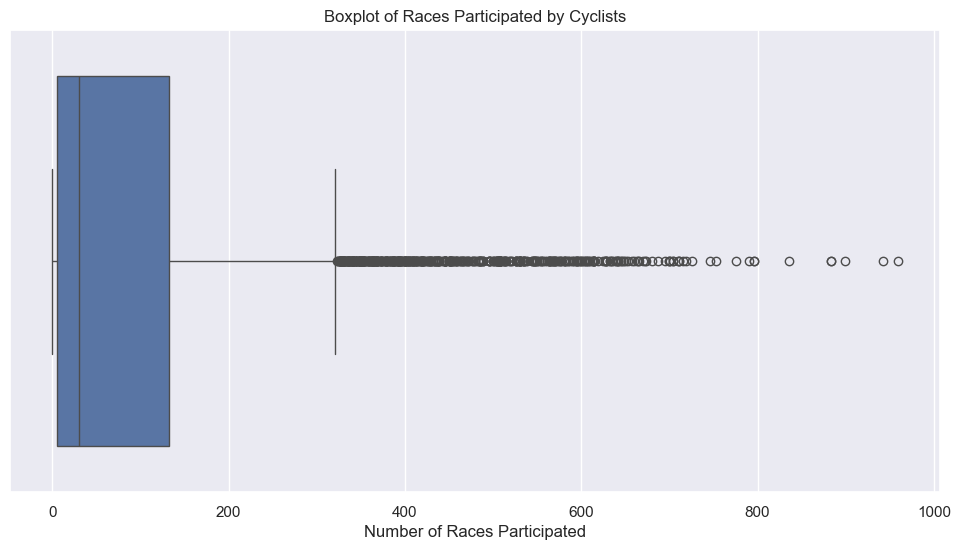

In [559]:
# Histogram of races participated
plt.figure(figsize=(12, 6))
sns.histplot(cyclists_df['races_participated'], bins=30, kde=True)
plt.title('Distribution of Races Participated by Cyclists')
plt.xlabel('Number of Races Participated')
plt.ylabel('Frequency')
plt.show()

# Boxplot of races participated
plt.figure(figsize=(12, 6))
sns.boxplot(x=cyclists_df['races_participated'])
plt.title('Boxplot of Races Participated by Cyclists')
plt.xlabel('Number of Races Participated')
plt.show()

In [560]:
# todo: outliers?

## Handling missing values


In [561]:
# create a copy to be used later for comapring the results
cyclists_df_before_filling_missing_values = cyclists_df.copy()

display_missing_values(df=cyclists_df, df_name='Cyclists Dataset') # todo: ripeti anche alla fine dell'handle missing values


Number of missing values and their percentage in Cyclists Dataset:
                    Missing Values  Percentage
_url                             0        0.00
name                             0        0.00
birth_year                      13        0.21
weight                        3056       49.82
height                        2991       48.76
nationality                      1        0.02
BMI                           3063       49.93
races_participated               0        0.00


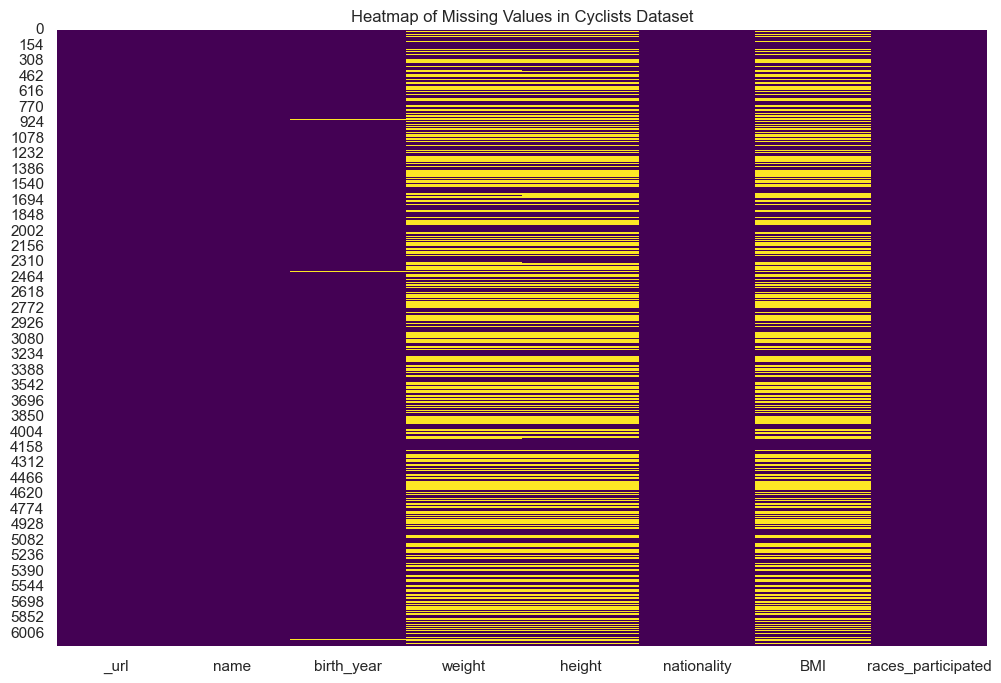

In [562]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Cyclists Dataset')
plt.show()

### Handle missing birth year values

In [563]:
missing_birth_year_cyclists = cyclists_df[cyclists_df['birth_year'].isnull()]
print(f"Number of records with missing birth year: {len(missing_birth_year_cyclists)}")
missing_birth_year_cyclists

Number of records with missing birth year: 13


,_url,name,birth_year,weight,height,nationality,BMI,races_participated
9,scott-davies,Scott Davies,<NA>,<NA>,<NA>,<NA>,<NA>,52
601,vladimir-malakov,Vladimir Malakov,<NA>,<NA>,<NA>,Russia,<NA>,14
894,antonio-zanini,Antonio Zanini,<NA>,<NA>,<NA>,Italy,<NA>,2
2408,filippo-simonetti,Filippo Simonetti,<NA>,<NA>,<NA>,Italy,<NA>,1
2515,carlos-garcia,Carlos García,<NA>,<NA>,<NA>,Spain,<NA>,1
2536,alexandr-osipov,Alexandr Osipov,<NA>,<NA>,<NA>,Russia,<NA>,13
3046,nicolai-kosyakov,Nicolai Kosyakov,<NA>,<NA>,<NA>,Russia,<NA>,11
3551,nevens-guy,Guy Nevens,<NA>,<NA>,<NA>,Belgium,<NA>,1
4142,oscar-pumar,Oscar Pumar,<NA>,<NA>,<NA>,Venezuela,<NA>,1
4384,javier-luquin,Javier Luquin,<NA>,<NA>,<NA>,Spain,<NA>,1


Since there are a very few missing values for the birth year attribute, we fill in with values found from reliable sources, where possible:

In [564]:
'''Sources:
https://www.procyclingstats.com/rider/antonio-zanini
https://www.procyclingstats.com/rider/vladimir-malakov
https://www.wikiwand.com/en/articles/Scott_Davies_(cyclist)
'''
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', ['nationality', 'height', 'weight', 'birth_year']] = ['great britain', 184, 66, 1995]
cyclists_df.loc[cyclists_df['_url'] == 'vladimir-malakov', ['birth_year']] = [1958]
cyclists_df.loc[cyclists_df['_url'] == 'antonio-zanini', ['birth_year']] = [1965]

For the few remaining, we fill in with the mode value of the birth year attribute.

In [565]:
# Fill missing birth_year values with the mode value
mode_birth_year = cyclists_df['birth_year'].mode()[0]
cyclists_df = cyclists_df.assign(birth_year=cyclists_df['birth_year'].fillna(mode_birth_year))

# Verify that there are no more missing values in the birth_year column
print(cyclists_df['birth_year'].isnull().sum())

0


### Handle missing values for weight and height

To fill the missing values for weight and height while maintaining a normal distribution:
- For missing heights: Fill in with a random value taken from individuals of the same nationality and within a weight range of ±3 kg. If weight is also missing, fill in with a random height taken from individuals of the same nationality.
- For missing weights: Fill in with a random value taken from individuals of the same nationality and within a height range of ±3 cm.

- If there is no value found in the range, we fill with a value from the entire dataset (not only from the same nation).
- For countries with less than 10 individuals, we also use the entire dataset to fill in the missing values.

In [566]:
import pandas as pd

# Fill missing heights
def fill_missing_heights(df):
    nationality_counts = df['nationality'].value_counts()
    for idx, row in df[df['height'].isnull()].iterrows():
        nationality = row['nationality']
        weight = row['weight']
        
        if nationality_counts.get(nationality, 0) < 50:
            # Use entire dataset
            candidates = df[df['height'].notnull()]
        elif pd.notnull(weight):
            # Find candidates with same nationality and weight within ±3 kg
            candidates = df[
                (df['nationality'] == nationality) &
                (df['weight'].between(weight - 3, weight + 3)) &
                (df['height'].notnull())
            ]
        else:
            # Weight is missing, find candidates with same nationality
            candidates = df[
                (df['nationality'] == nationality) &
                (df['height'].notnull())
            ]
        
        if candidates.empty:
            # Fill from entire dataset
            candidates = df[df['height'].notnull()]
        
        if not candidates.empty:
            # Randomly select a height from candidates
            df.at[idx, 'height'] = candidates['height'].sample(n=1).values[0]

# Fill missing weights
def fill_missing_weights(df):
    nationality_counts = df['nationality'].value_counts()
    for idx, row in df[df['weight'].isnull()].iterrows():
        nationality = row['nationality']
        height = row['height']
        
        if nationality_counts.get(nationality, 0) < 50:
            # Use entire dataset
            candidates = df[df['weight'].notnull()]
        elif pd.notnull(height):
            # Find candidates with same nationality and height within ±3 cm
            candidates = df[
                (df['nationality'] == nationality) &
                (df['height'].between(height - 3, height + 3)) &
                (df['weight'].notnull())
            ]
        else:
            # Height is missing, find candidates with same nationality
            candidates = df[
                (df['nationality'] == nationality) &
                (df['weight'].notnull())
            ]
        
        if candidates.empty:
            # Fill from entire dataset
            candidates = df[df['weight'].notnull()]
        
        if not candidates.empty:
            # Randomly select a weight from candidates
            df.at[idx, 'weight'] = candidates['weight'].sample(n=1).values[0]

# Apply the functions
fill_missing_heights(cyclists_df)
fill_missing_weights(cyclists_df)

We now check if there are any missing values left in the dataset.

In [567]:
# Print records with missing height
print("Records with missing height:")
cyclists_df[cyclists_df['height'].isnull()]


Records with missing height:


,_url,name,birth_year,weight,height,nationality,BMI,races_participated


In [568]:
# Print records with missing weight
print("\nRecords with missing weight:")
cyclists_df[cyclists_df['weight'].isnull()]


Records with missing weight:


,_url,name,birth_year,weight,height,nationality,BMI,races_participated


Now, let's check how the handling this missing values affected the distribution of the weight and height attributes, compared to the original distribution.

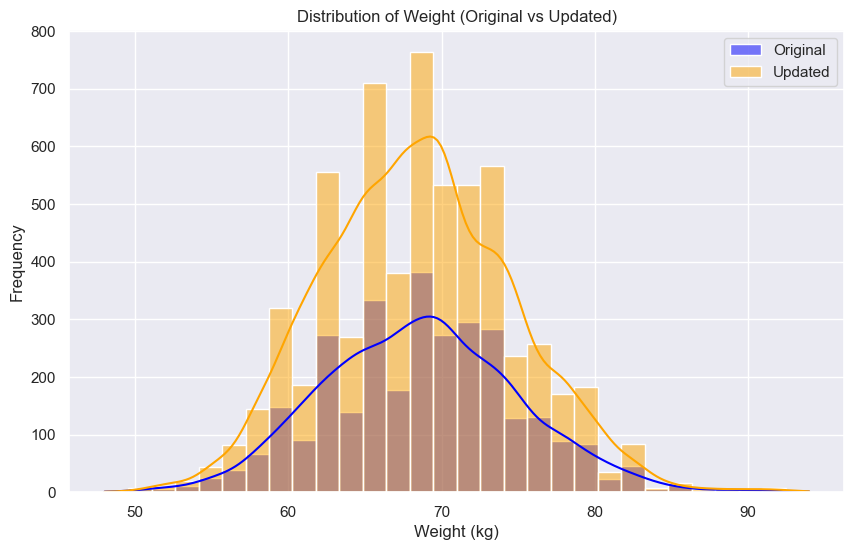

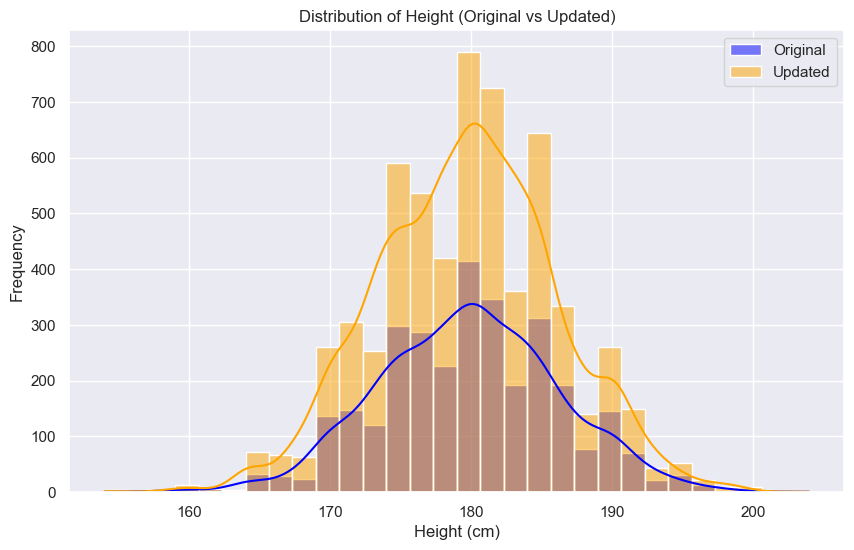

In [569]:
# Plot the original distribution of weight
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df_before_filling_missing_values['weight'].dropna(), bins=30, kde=True, color='blue', label='Original')
sns.histplot(cyclists_df['weight'].dropna(), bins=30, kde=True, color='orange', label='Updated')
plt.title('Distribution of Weight (Original vs Updated)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the original distribution of height
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df_before_filling_missing_values['height'].dropna(), bins=30, kde=True, color='blue', label='Original')
sns.histplot(cyclists_df['height'].dropna(), bins=30, kde=True, color='orange', label='Updated')
plt.title('Distribution of Height (Original vs Updated)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

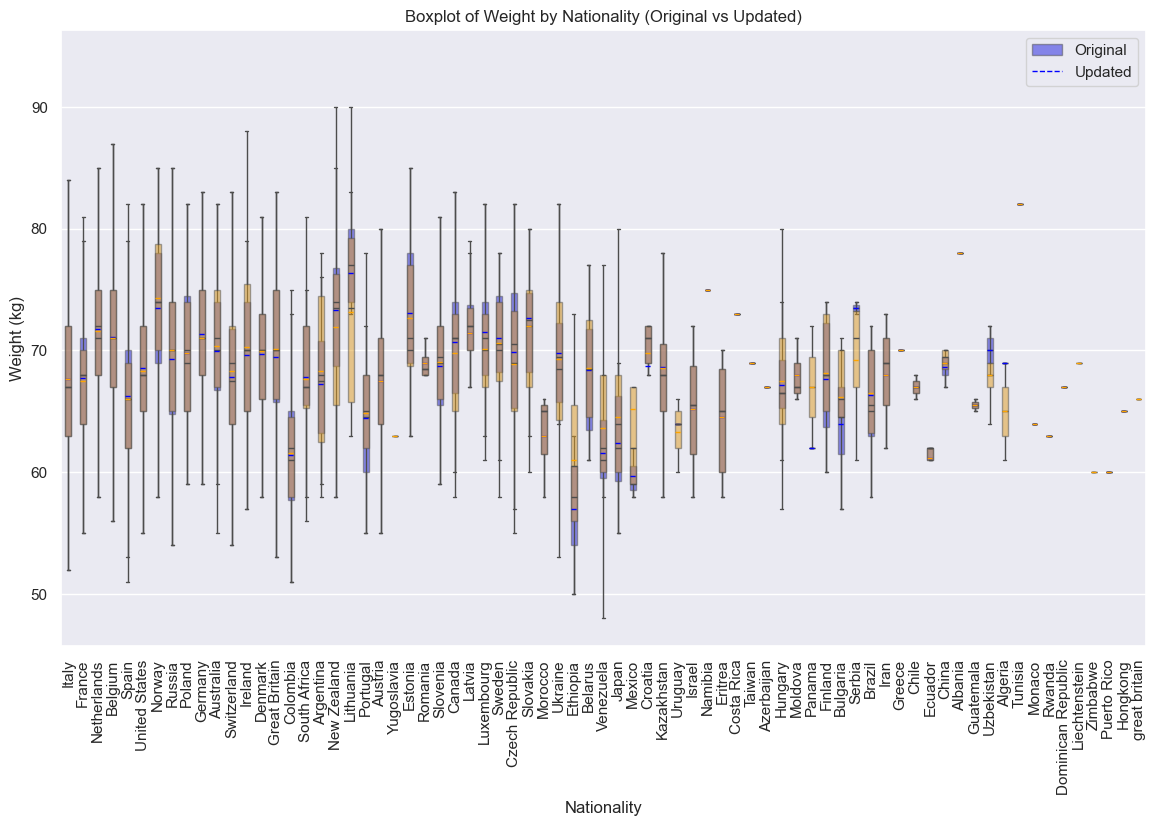

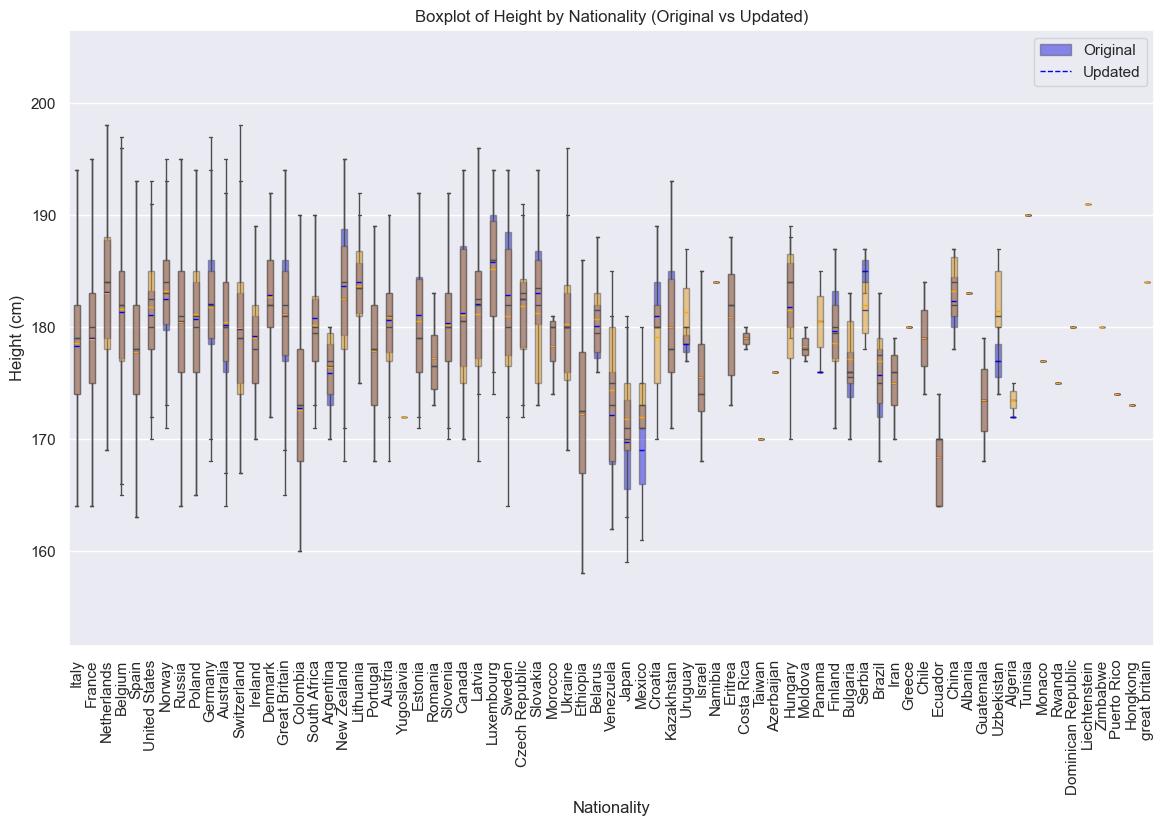

In [570]:
# Boxplot of weight by nationality (Original vs Updated)
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='weight', data=cyclists_df_before_filling_missing_values, color='blue', fliersize=0, width=0.4, boxprops=dict(alpha=0.5), showmeans=True, meanline=True, meanprops=dict(color='blue', linestyle='--'))
sns.boxplot(x='nationality', y='weight', data=cyclists_df, color='orange', fliersize=0, width=0.4, boxprops=dict(alpha=0.5), showmeans=True, meanline=True, meanprops=dict(color='orange', linestyle='--'))
plt.title('Boxplot of Weight by Nationality (Original vs Updated)')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.legend(['Original', 'Updated'])
plt.show()

# Boxplot of height by nationality (Original vs Updated)
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='height', data=cyclists_df_before_filling_missing_values, color='blue', fliersize=0, width=0.4, boxprops=dict(alpha=0.5), showmeans=True, meanline=True, meanprops=dict(color='blue', linestyle='--'))
sns.boxplot(x='nationality', y='height', data=cyclists_df, color='orange', fliersize=0, width=0.4, boxprops=dict(alpha=0.5), showmeans=True, meanline=True, meanprops=dict(color='orange', linestyle='--'))
plt.title('Boxplot of Height by Nationality (Original vs Updated)')
plt.xlabel('Nationality')
plt.ylabel('Height (cm)')
plt.xticks(rotation=90)
plt.legend(['Original', 'Updated'])
plt.show()


---


In [571]:
# TODO: fare una funzione per aggiungere i birth year. aggiungere i valori mancanti da wikipedia manualmente

In [572]:


# TODO: decidere se togliere plamen-stanev, perché è tredicenne https://www.procyclingstats.com/rider/plamen-stanev


# fonte = https://www.wikiwand.com/it/articles/Scott_Davies


# Update the cyclist with the specified URL
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', ['nationality', 'height', 'weight', 'birth_year']] = ['Great Britain', 184, 66, 1995]

# Verify the update
scott = cyclists_df[cyclists_df['_url'] == 'scott-davies']
print(scott)

# TODO: controllare se ha funzionato

           _url           name  birth_year  weight  height    nationality  \
9  scott-davies  Scott  Davies        1995      66     184  Great Britain   

    BMI  races_participated  
9  <NA>                  52  


## Feature Engineering


- per ogni ciclista, il numero di gare che ha vinto?
- per ogni ciclista, una cosa tipo delta * points
- qualcosa con profiles?

In [573]:
# TODO: novel feature = IMC? 


---


### average_delta attribute

A useful feature to have is the average delta of a cyclist, across all the races he has participated in. This can give us an idea of how well the cyclist performs on average.

In [574]:
# Merge the DataFrames on the _url column
merged_df = races_df.merge(cyclists_df, left_on='cyclist', right_on='_url', suffixes=('_race', '_cyclist'))
merged_df.head()

,_url_race,name_race,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,delta,year,_url_cyclist,name_cyclist,birth_year,weight,height,nationality,BMI,races_participated
0,tour-de-france/1978/stage-6,Tour de France,100,<NA>,162000,1101,1,1241,<NA>,1978-07-05 04:02:24,...,0,1978,sean-kelly,Sean Kelly,1956,77,180,Ireland,23.8,629
1,tour-de-france/1978/stage-6,Tour de France,100,<NA>,162000,1101,1,1241,<NA>,1978-07-05 04:02:24,...,0,1978,gerrie-knetemann,Gerrie Knetemann,1951,65,177,Netherlands,<NA>,271
2,tour-de-france/1978/stage-6,Tour de France,100,<NA>,162000,1101,1,1241,<NA>,1978-07-05 04:02:24,...,0,1978,rene-bittinger,René Bittinger,1954,69,174,France,22.8,146
3,tour-de-france/1978/stage-6,Tour de France,100,<NA>,162000,1101,1,1241,<NA>,1978-07-05 04:02:24,...,0,1978,joseph-bruyere,Joseph Bruyère,1948,72,178,Belgium,<NA>,48
4,tour-de-france/1978/stage-6,Tour de France,100,<NA>,162000,1101,1,1241,<NA>,1978-07-05 04:02:24,...,0,1978,sven-ake-nilsson,Sven-Åke Nilsson,1951,63,172,Sweden,21.3,145


In [575]:
# Create the average_delta feature
average_delta = merged_df.groupby('_url_cyclist').agg(
    average_delta=pd.NamedAgg(column='delta', aggfunc='mean')
).reset_index()

# Convert average_delta to int64 by rounding
average_delta['average_delta'] = average_delta['average_delta'].round().astype('Int64')

# Merge the average_delta feature back into cyclists_df
cyclists_df = cyclists_df.merge(average_delta, left_on='_url', right_on='_url_cyclist', how='left')

# Fill NaN values with 0 for the new feature
cyclists_df['average_delta'] = cyclists_df['average_delta'].fillna(0).astype('Int64')

# Display the updated cyclists_df
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality,BMI,races_participated,_url_cyclist,average_delta
0,bruno-surra,Bruno Surra,1964,68,190,Italy,<NA>,1,bruno-surra,15
1,gerard-rue,Gérard Rué,1965,74,182,France,22.3,222,gerard-rue,319
2,jan-maas,Jan Maas,1996,69,189,Netherlands,19.3,49,jan-maas,451
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995,78,192,Belgium,21.2,161,nathan-van-hooydonck,646
4,jose-felix-parra,José Félix Parra,1997,55,171,Spain,18.8,48,jose-felix-parra,294


## Handling Outliers

In [576]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _url                6134 non-null   string 
 1   name                6134 non-null   string 
 2   birth_year          6134 non-null   Int64  
 3   weight              6134 non-null   Int64  
 4   height              6134 non-null   Int64  
 5   nationality         6134 non-null   string 
 6   BMI                 3071 non-null   Float64
 7   races_participated  6134 non-null   int64  
 8   _url_cyclist        6095 non-null   string 
 9   average_delta       6134 non-null   Int64  
dtypes: Float64(1), Int64(4), int64(1), string(4)
memory usage: 509.3 KB


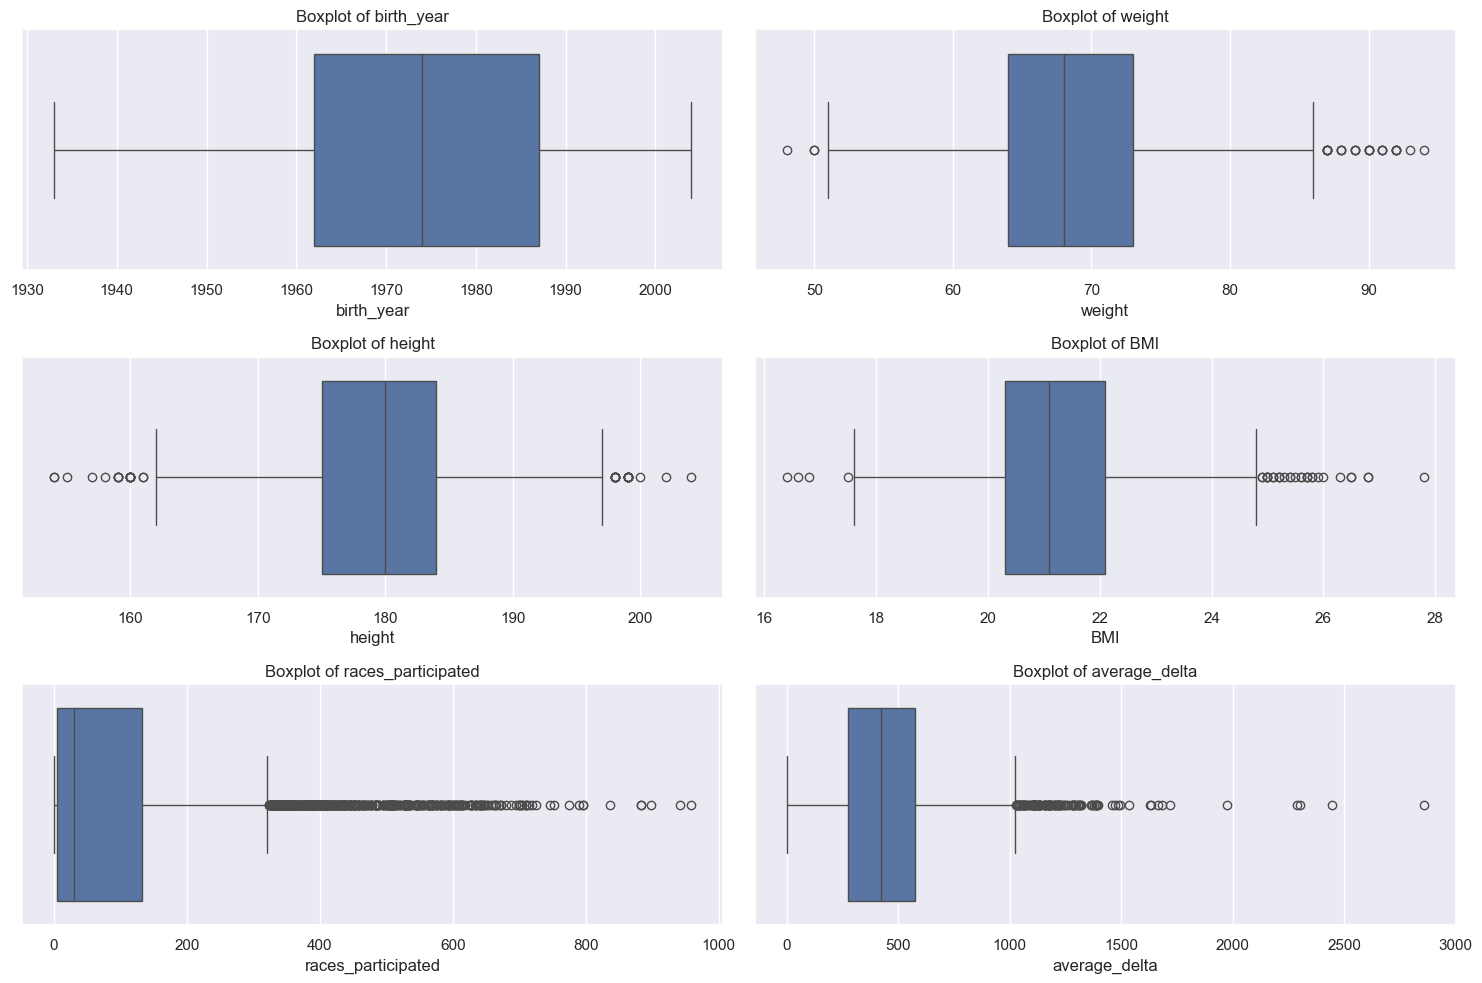

In [577]:
# List of numerical columns to visualize outliers
numerical_columns = ['birth_year', 'weight', 'height', 'BMI', 'races_participated', 'average_delta']

# Call the function to visualize outliers
print_boxplots(cyclists_df, numerical_columns)

In [578]:
# TODO: fare come visto a laboratorio, non so se abbiamo fatto così. dovremmo usare un algoritmo diverso tipo isolation forestcredo

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# List of columns to check for outliers
columns_to_check = numerical_columns # TODO: altre?

# Apply the outlier handling function to each column
for column in columns_to_check:
    handle_outliers(cyclists_df, column)

# Verify the changes
cyclists_df[columns_to_check].describe()

,birth_year,weight,height,BMI,races_participated,average_delta
count,6134.000000,6134.000000,6134.000000,3071.000000,6134.000000,6134.000000
mean,1974.054777,68.445386,179.698891,21.204331,83.830942,435.243397
std,15.528767,6.187755,6.403122,1.338098,105.298764,229.358912
min,1933.000000,50.500000,161.500000,17.600000,0.000000,0.000000
25%,1962.000000,64.000000,175.000000,20.300000,5.000000,274.250000
50%,1974.000000,68.000000,180.000000,21.100000,30.000000,425.000000
75%,1987.000000,73.000000,184.000000,22.100000,132.000000,575.750000
max,2004.000000,86.500000,197.500000,24.800000,322.500000,1028.000000


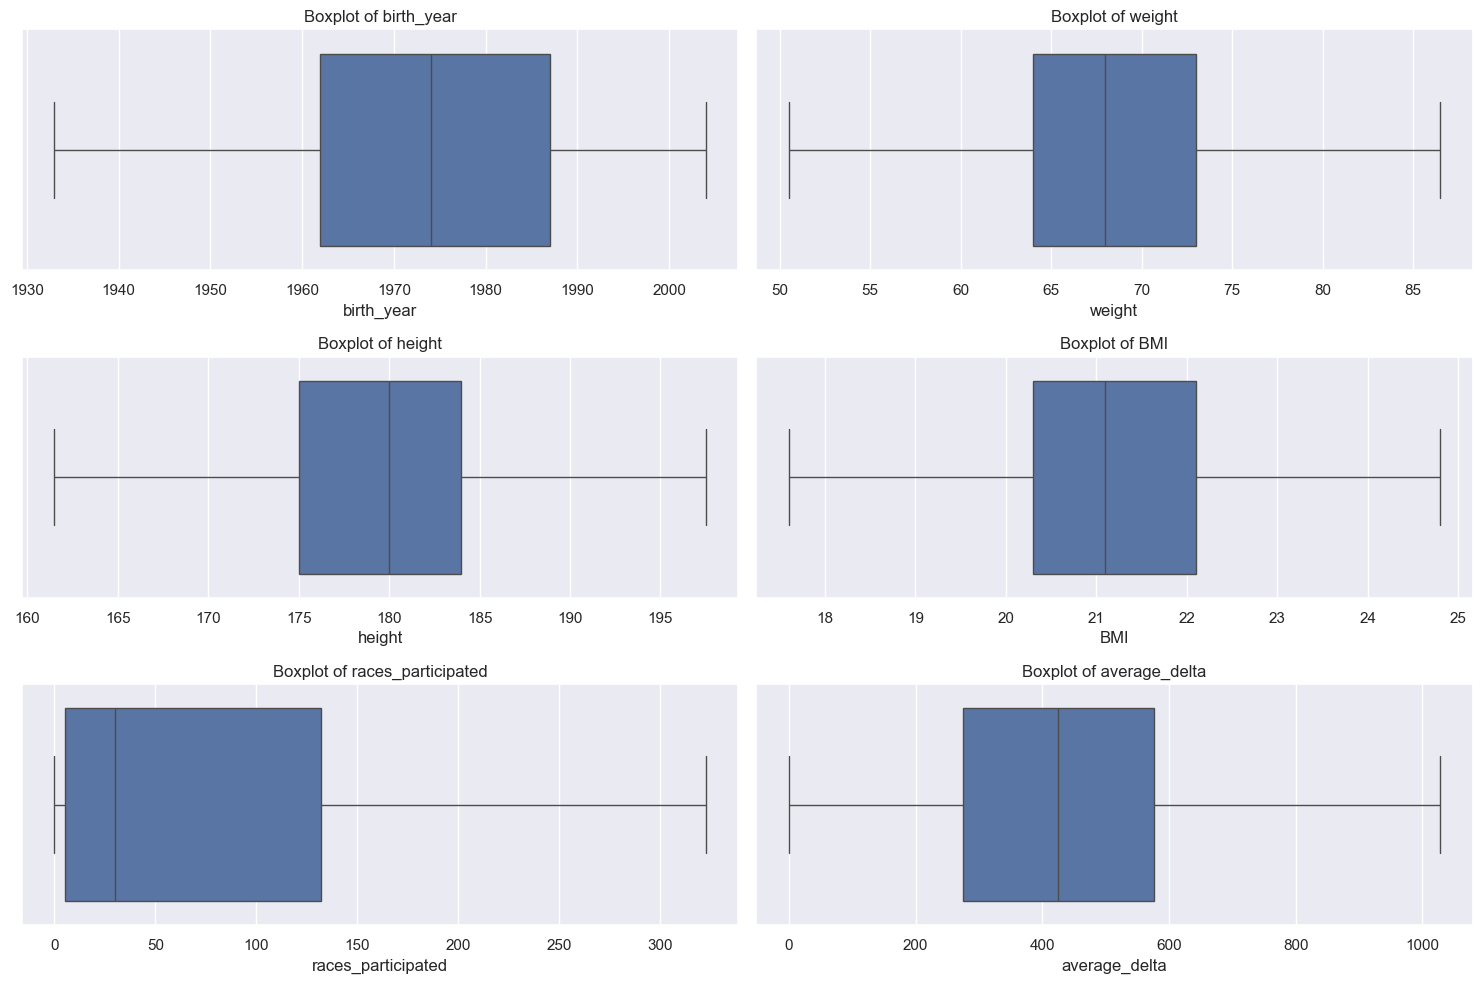

In [579]:
print_boxplots(cyclists_df, numerical_columns)

# Data Transformation for the Races dataset

In [580]:
duplicates = cyclists_df.duplicated().sum()
print(f"number of duplicated records in cyclists = {duplicates}")
duplicates = races_df.duplicated(subset=['_url', 'name', 'climb_total', 'length', 'date', 'cyclist', 'cyclist_team']).sum()
print(f"number of duplicated records in races = {duplicates}")

# drop duplicates in the race daraframe
races_df = races_df.drop_duplicates(subset=['_url', 'name', 'climb_total', 'length', 'date', 'cyclist', 'cyclist_team'])

number of duplicated records in cyclists = 0
number of duplicated records in races = 47


We 
We decide to drop the time attribute, since it is irrelevant and noisy.
We just keep the date attribute, which is more relevant.

In [581]:
# separate the field "date" into 2 different fields, "race_day" and "race time"
races_df[['race_day', 'race_time']] = races_df['date'].str.split(' ', expand=True)

# convert race_day from object --> datetime
races_df['race_day'] = pd.to_datetime(races_df['race_day'], errors='coerce')


races_df.drop(columns=['race_time', 'date'], inplace=True)

In [582]:
# drop the column 'average_temperature' for it has too many missing values
# races_df = races_df.drop('average_temperature', axis=1) # todo: spostarlo qui, invece che farlo sopra?

# drop the columns 'is_tarmac', 'is_cobbled', 'is_gravel' for they do not provide any useful information
races_df = races_df.drop(['is_tarmac', 'is_cobbled', 'is_gravel'], axis=1)

In [583]:
# Error in the cyclist age
underage = races_df[races_df['cyclist_age'] < 18 ]
underage

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist,cyclist_age,cyclist_team,delta,year,race_day
294489,san-sebastian/2001/result,Clasica Ciclista San Sebastian,225,<NA>,227000,<NA>,2,1048,<NA>,91,plamen-stanev,13,<NA>,663,2001,2001-08-11


We drop this cyclist, since he is an outlier.

In [584]:
races_df = races_df[races_df['cyclist_age'] >= 18]

## Missing Values

We now check for missing values in the dataset.

We begin by checking, for each column, the absolute number of missing values, and the percentage of missing values.

In [585]:
# Calculate the number of missing values for each column
missing_values_races = races_df.isnull().sum()

display_missing_values(df=races_df, df_name="Races Dataset")


Number of missing values and their percentage in Races Dataset:
                     Missing Values  Percentage
_url                              0        0.00
name                              0        0.00
points                          477        0.08
uci_points                   338584       57.42
length                            0        0.00
climb_total                  147002       24.93
profile                      148012       25.10
startlist_quality                 0        0.00
average_temperature          559685       94.92
position                          0        0.00
cyclist                           0        0.00
cyclist_age                       0        0.00
cyclist_team                 159024       26.97
delta                             0        0.00
year                              0        0.00
race_day                          0        0.00


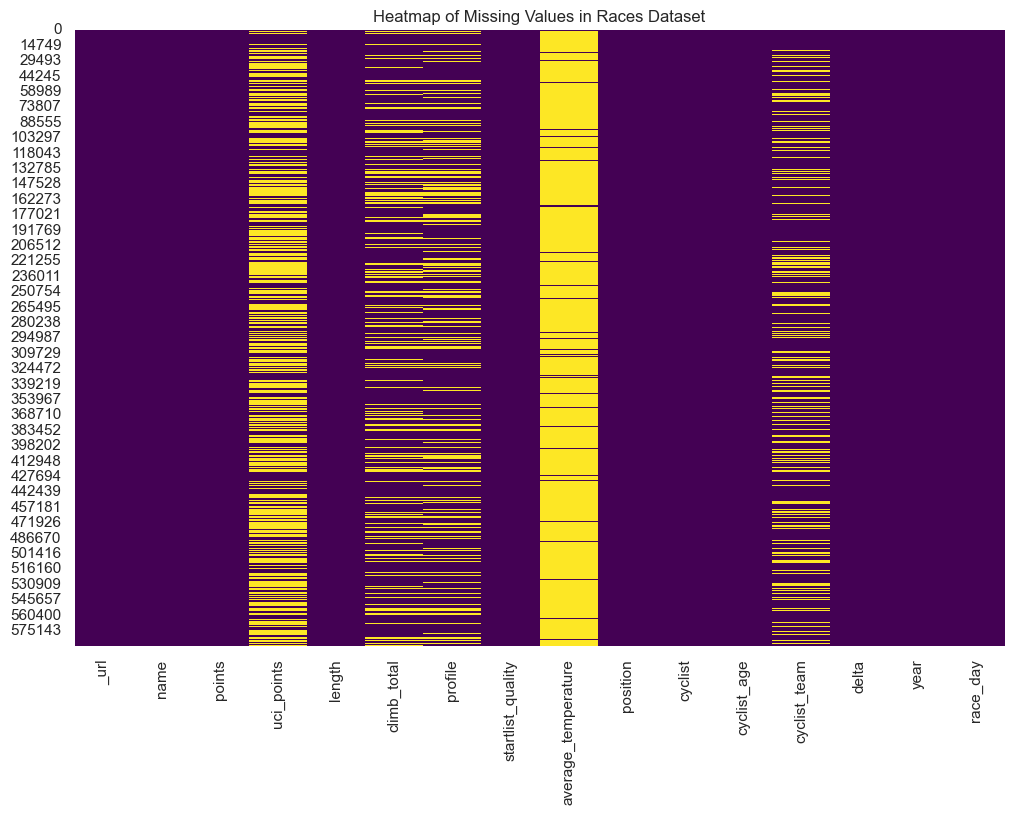

In [586]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Races Dataset')
plt.show()

since 94% of temperature values are missing, we drop it. Since 57% of uci_points are missing, and we also have a highly correlated feature (points), we drop it as well.


todo: decidere cosa fare con gli altri missing

todo: per i team mancanti: fare scraping da procyclingstats per fillare i valori mancanti? 


















In [587]:
# Drop the average_temperature column
races_df = races_df.drop(columns=['average_temperature', 'uci_points'])



races_df.columns

Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'position', 'cyclist', 'cyclist_age',
       'cyclist_team', 'delta', 'year', 'race_day'],
      dtype='object')

## Outliers

In [ ]:

# todo: fare come fatto in cyclists, una volta sicuri

## Discretization

Categorizing the 'climb_total' according to the percentile

the resulting graph shows that the frequency of each category is more or less the same

climb_length
medium 25-50%     110824
short 0-25%       110681
Very long >75%    110611
long 50-75%       110500
Name: count, dtype: int64


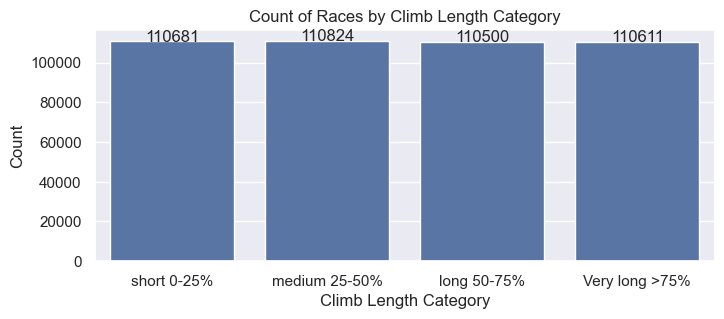

In [589]:
bins = [0, races_df['climb_total'].quantile(0.25), races_df['climb_total'].quantile(0.5), races_df['climb_total'].quantile(0.75), races_df['climb_total'].max()]
labels = ['short 0-25%', 'medium 25-50%', 'long 50-75%', 'Very long >75%']
races_df['climb_length'] = pd.cut(races_df['climb_total'], bins=bins, labels=labels)
print(races_df['climb_length'].value_counts())

plt.figure(figsize=(8, 3))
sns.countplot(x='climb_length', data=races_df)
plt.title('Count of Races by Climb Length Category')
plt.xlabel('Climb Length Category')
plt.ylabel('Count')

# Show the value on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height().astype('int64')}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


# todo: discretizzare e tenere anche la variabile continua originale?

Categorizing the 'length' according to the percentile

the resulting graph shows that the frequency of each category is more or less the same

length_catogory
long 50-75%       148373
short 0-25%       147538
medium 25-50%     147482
Very long >75%    146225
Name: count, dtype: int64


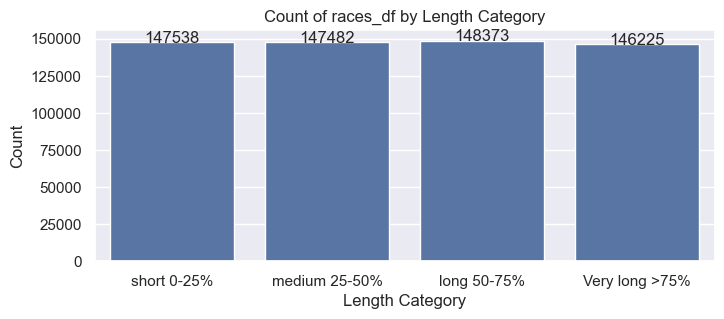

In [590]:
bins = [0, races_df['length'].quantile(0.25), races_df['length'].quantile(0.5), races_df['length'].quantile(0.75), races_df['length'].max()]
labels = ['short 0-25%', 'medium 25-50%', 'long 50-75%', 'Very long >75%']
races_df['length_catogory'] = pd.cut(races_df['length'], bins=bins, labels=labels)
print(races_df['length_catogory'].value_counts())

plt.figure(figsize=(8, 3))
sns.countplot(x='length_catogory', data=races_df)
plt.title('Count of races_df by Length Category')
plt.xlabel('Length Category')
plt.ylabel('Count')

# Show the value on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height().astype('int64')}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

# Conclusions


In [591]:
races_df.info()
races_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 589618 entries, 0 to 589864
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               589618 non-null  string        
 1   name               589618 non-null  string        
 2   points             589141 non-null  Int64         
 3   length             589618 non-null  Int64         
 4   climb_total        442616 non-null  Int64         
 5   profile            441606 non-null  Int64         
 6   startlist_quality  589618 non-null  int64         
 7   position           589618 non-null  int64         
 8   cyclist            589618 non-null  string        
 9   cyclist_age        589618 non-null  Int64         
 10  cyclist_team       430594 non-null  string        
 11  delta              589618 non-null  Int64         
 12  year               589618 non-null  int32         
 13  race_day           589618 non-null  datetime64[ns

,points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year,race_day
count,589141.0,589618.0,442616.0,441606.0,589618.000000,589618.000000,589618.0,589618.0,589618.000000,589618
mean,89.224033,166791.113161,2330.779409,2.611577,1101.214539,74.224048,28.486468,418.734231,2006.170354,2006-08-13 04:35:15.143025152
min,18.0,1000.0,2.0,1.0,115.000000,0.000000,19.0,0.0,1970.000000,1970-02-28 00:00:00
25%,50.0,152500.0,1309.0,1.0,844.000000,32.000000,26.0,10.0,1999.000000,1999-07-18 00:00:00
50%,80.0,178200.0,2255.0,2.0,988.000000,70.000000,28.0,156.0,2008.000000,2008-05-03 00:00:00
75%,100.0,203500.0,3273.0,4.0,1309.000000,112.000000,31.0,624.0,2015.000000,2015-08-29 00:00:00
max,350.0,338000.0,6974.0,5.0,2047.000000,209.000000,56.0,61547.0,2023.000000,2023-07-29 00:00:00
std,54.441693,64533.147924,1375.590474,1.491747,380.635626,48.406842,3.855746,842.110515,11.475513,NaN


In [592]:
cyclists_df.info()
cyclists_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _url                6134 non-null   string 
 1   name                6134 non-null   string 
 2   birth_year          6134 non-null   int64  
 3   weight              6134 non-null   float64
 4   height              6134 non-null   float64
 5   nationality         6134 non-null   string 
 6   BMI                 3071 non-null   float64
 7   races_participated  6134 non-null   float64
 8   _url_cyclist        6095 non-null   string 
 9   average_delta       6134 non-null   float64
dtypes: float64(5), int64(1), string(4)
memory usage: 479.3 KB


,birth_year,weight,height,BMI,races_participated,average_delta
count,6134.000000,6134.000000,6134.000000,3071.000000,6134.000000,6134.000000
mean,1974.054777,68.445386,179.698891,21.204331,83.830942,435.243397
std,15.528767,6.187755,6.403122,1.338098,105.298764,229.358912
min,1933.000000,50.500000,161.500000,17.600000,0.000000,0.000000
25%,1962.000000,64.000000,175.000000,20.300000,5.000000,274.250000
50%,1974.000000,68.000000,180.000000,21.100000,30.000000,425.000000
75%,1987.000000,73.000000,184.000000,22.100000,132.000000,575.750000
max,2004.000000,86.500000,197.500000,24.800000,322.500000,1028.000000


In [593]:
display_missing_values(df=cyclists_df, df_name='Cyclists Dataset')
display_missing_values(df=races_df, df_name='Races Dataset')


Number of missing values and their percentage in Cyclists Dataset:
                    Missing Values  Percentage
_url                             0        0.00
name                             0        0.00
birth_year                       0        0.00
weight                           0        0.00
height                           0        0.00
nationality                      0        0.00
BMI                           3063       49.93
races_participated               0        0.00
_url_cyclist                    39        0.64
average_delta                    0        0.00

Number of missing values and their percentage in Races Dataset:
                   Missing Values  Percentage
_url                            0        0.00
name                            0        0.00
points                        477        0.08
length                          0        0.00
climb_total                147002       24.93
profile                    148012       25.10
startlist_quality           

In [594]:
cyclists_df.to_pickle('cyclists_transformed.pkl') # save the transformed dataset, the pickle format is useful to also save the data types
races_df.to_pickle('races_transformed.pkl')